importing Jupyter notebook from time_plots.ipynb


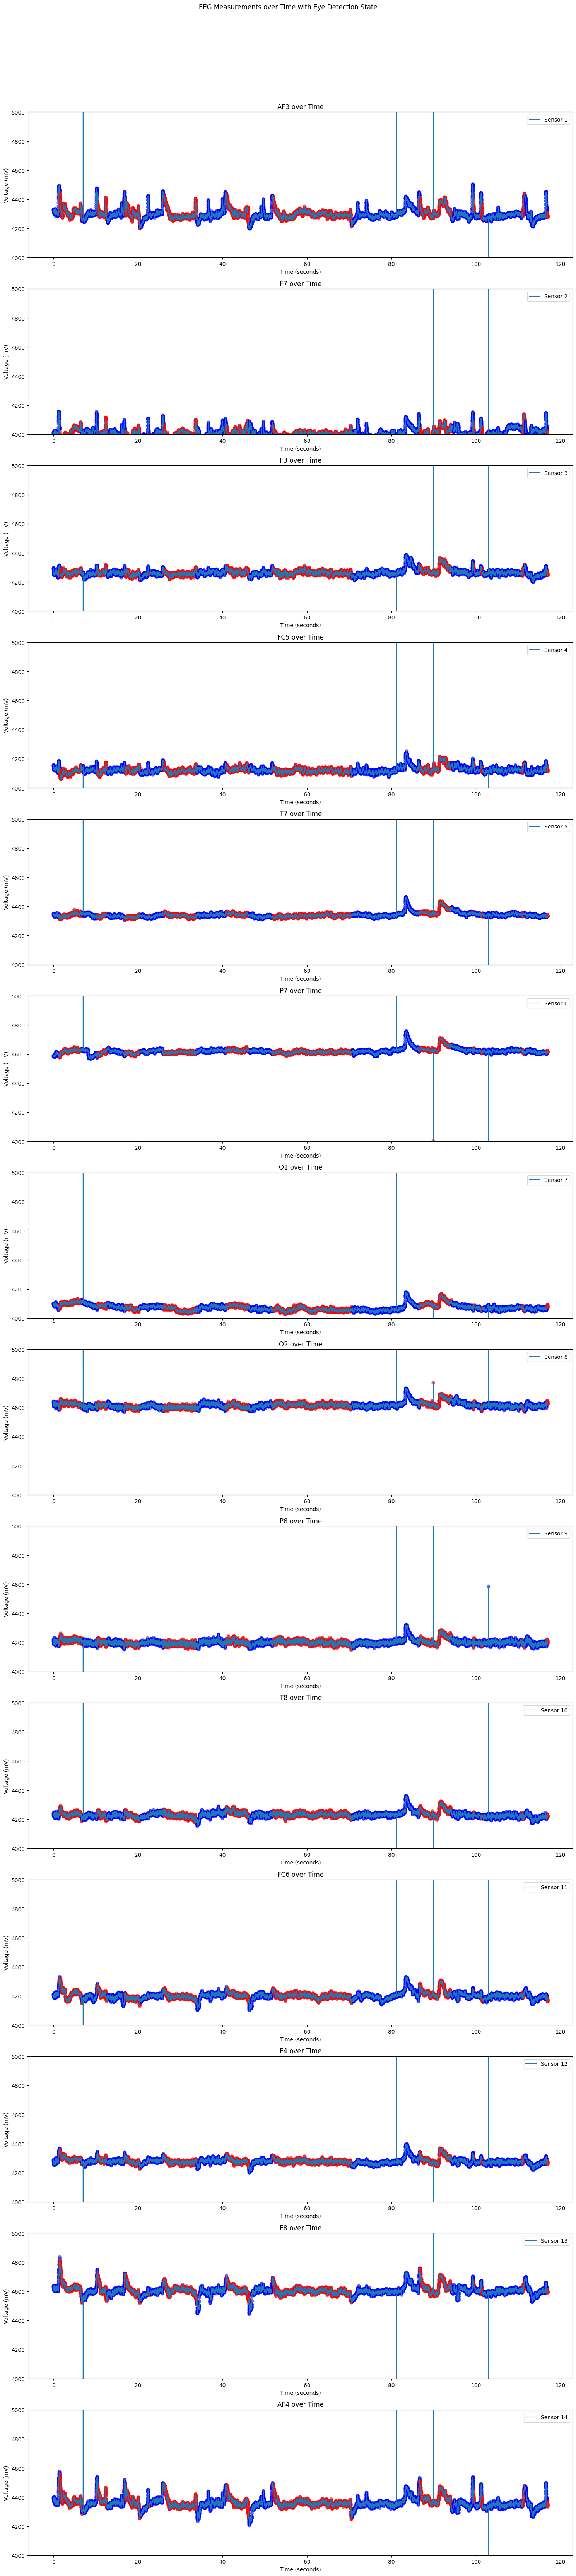

Maximum values per column with their indices:
              Max Value  Index
AF3           309231.00  11509
F7              7804.62  13179
F3              6880.51  11509
FC5           642564.00  10386
T7              6474.36  10386
P7            362564.00    898
O1            567179.00  10386
O2              7264.10  13179
P8            265641.00  11509
T8              6674.36  13179
FC6             6823.08  11509
F4              7002.56  13179
F8            152308.00  11509
AF4           715897.00    898
eyeDetection       1.00    188

Minimum values per column with their indices:
              Min Value  Index
AF3           1030.7700  13179
F7            2830.7700  10386
F3            1040.0000    898
FC5           2453.3300  13179
T7            2089.7400  13179
P7            2768.2100  13179
O1            2086.1500  11509
O2            4567.1800   2148
P8            1357.9500    898
T8            1816.4100  10386
FC6           3273.3300    898
F4            2257.9500  11509
F8      

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from time_plots import *

In [2]:
print(changes_df)

    change_times  change_indices
0       1.468456             188
1       6.803325             871
2      10.435410            1336
3      12.794312            1638
4      16.996595            2176
5      20.566193            2633
6      22.651712            2900
7      22.862608            2927
8      26.104146            3342
9      33.993190            4352
10     40.960545            5244
11     46.303225            5928
12     51.966153            6653
13     70.720208            9054
14     86.740437           11105
15     94.324855           12076
16     99.417585           12728
17     99.753455           12771
18    101.354697           12976
19    101.760865           13028
20    111.048067           14217
21    111.610455           14289
22    116.843781           14959


In [3]:
# Load the data
data = pd.read_csv("EEG_Eye_State_Classification.csv")

# Define the number of samples and duration
num_samples = 14980
total_duration = 117  # seconds
sample_rate = num_samples / total_duration  # Samples per second (Hz)

duration_to_analyze = 2 
samples_window = int(sample_rate * duration_to_analyze)

# Calculate the frequency bins
frequencies = np.fft.fftfreq(samples_window, d=1/sample_rate) # Get the corresponding frequencies for the FFT result 
feature_name = data.columns[0]

For all changes of the eye state.
4 plots, each of them of 2 sec <=> 256 samples.
All the plot includs the changing sample.

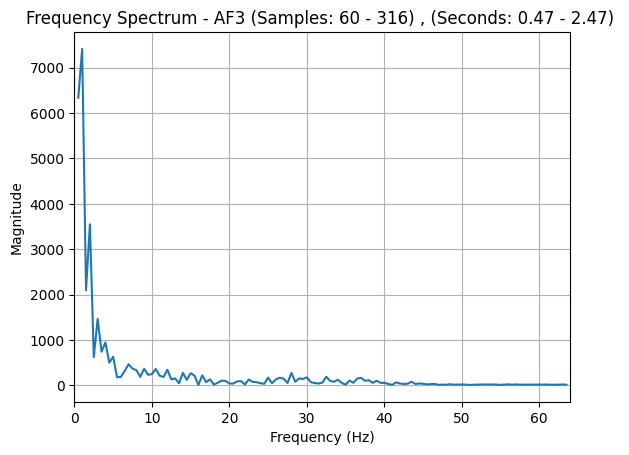

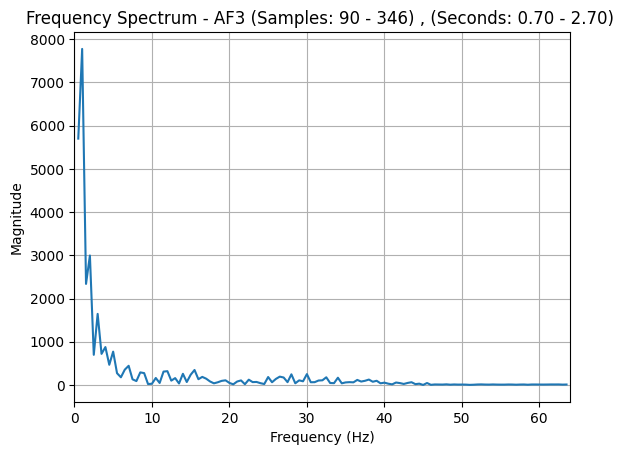

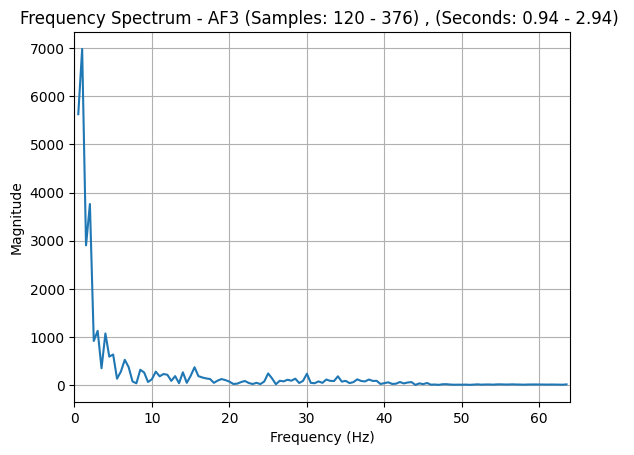

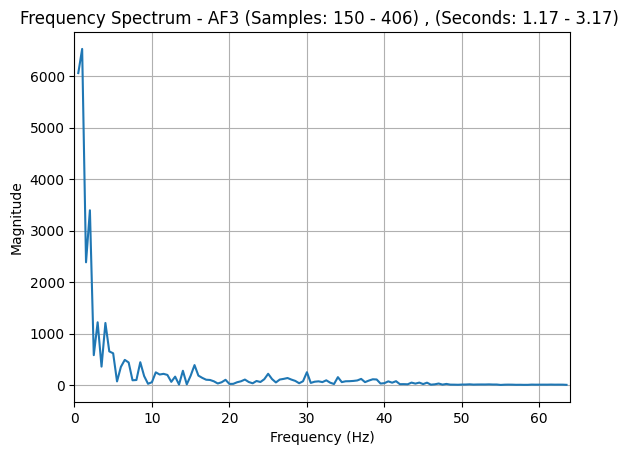

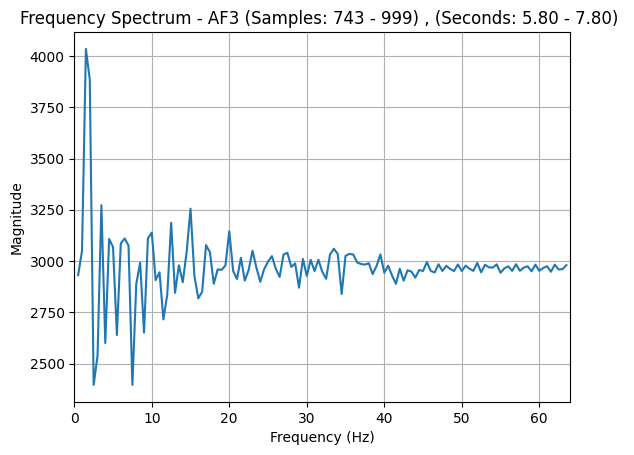

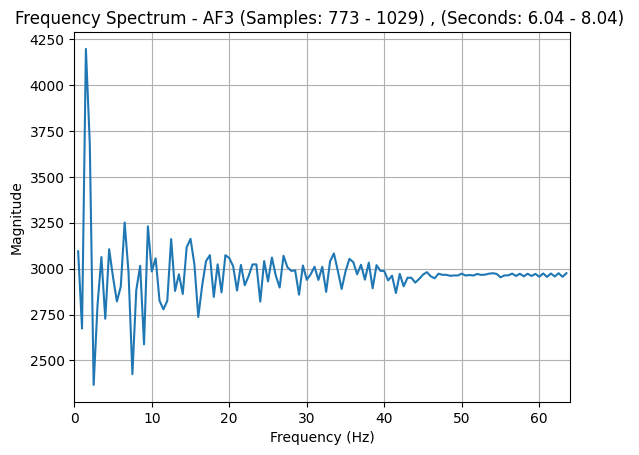

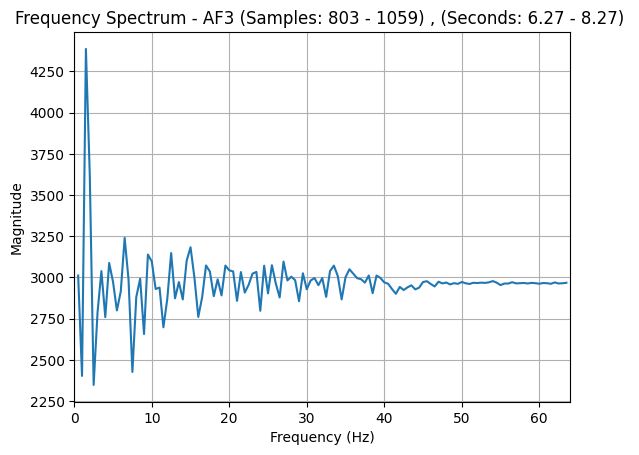

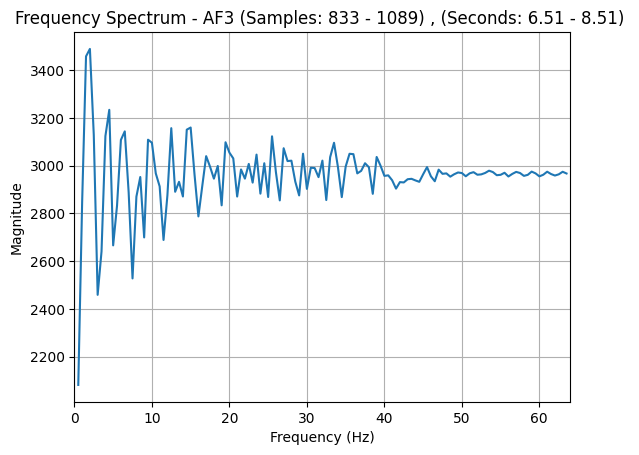

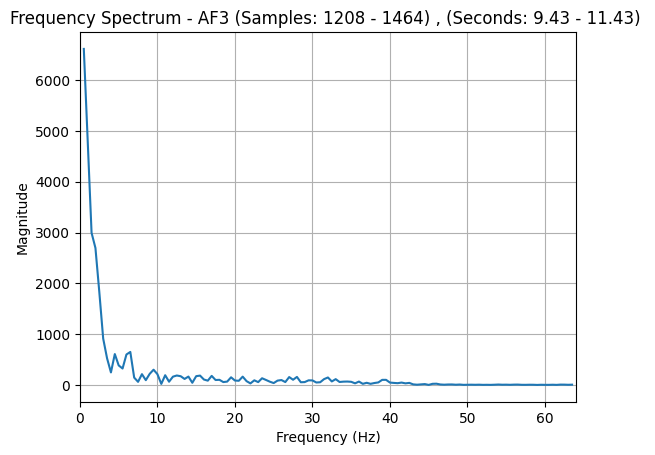

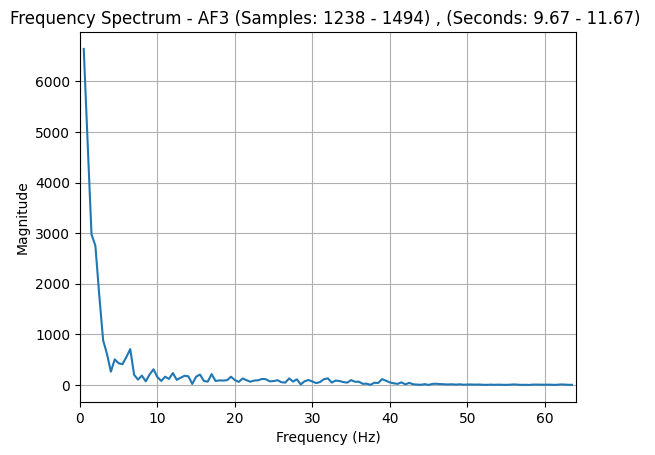

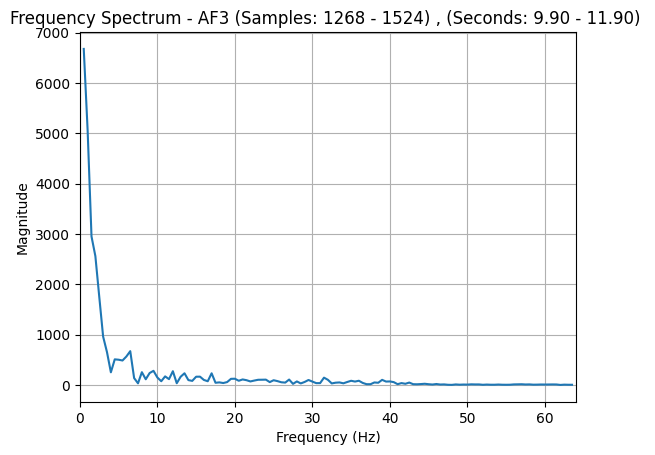

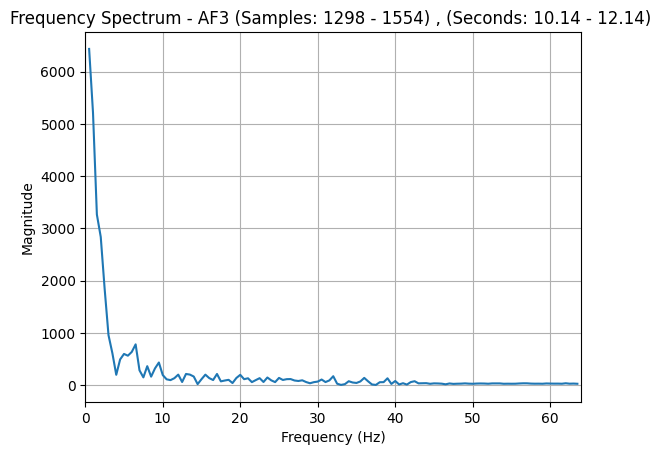

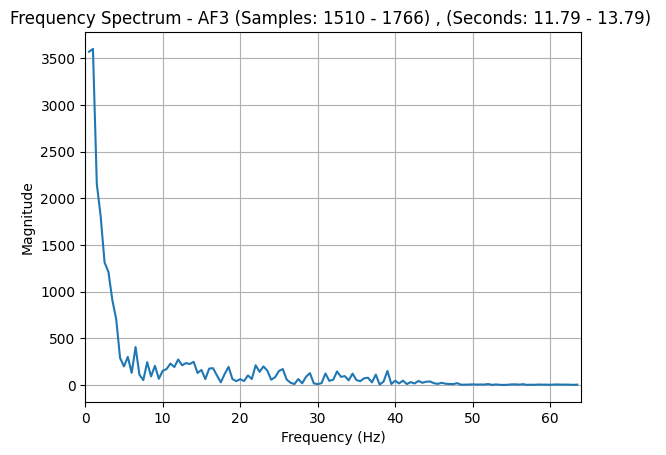

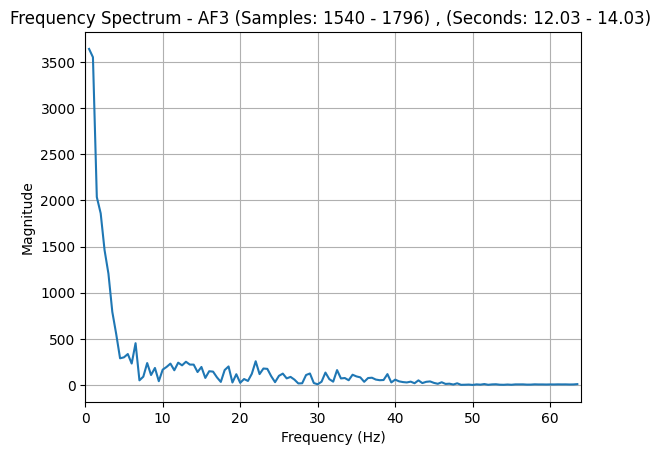

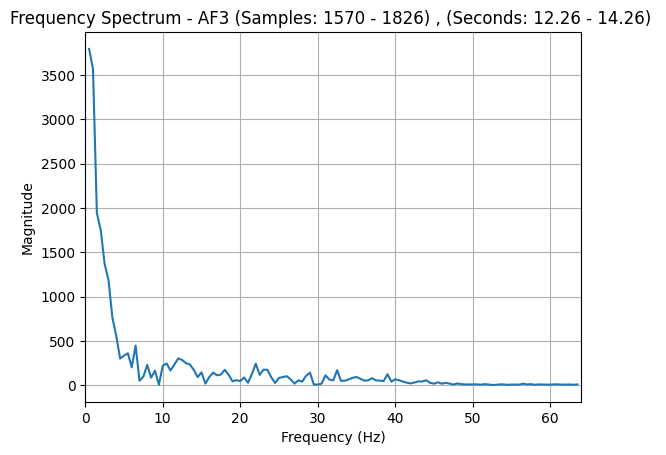

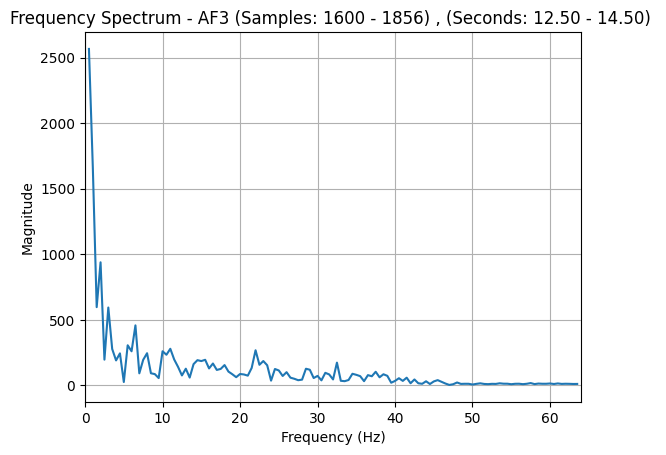

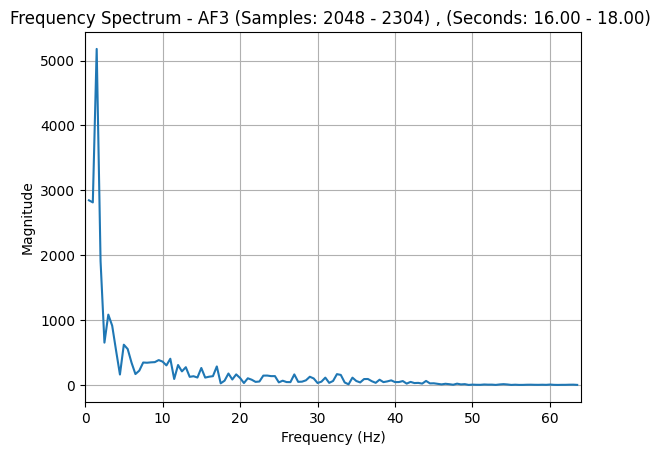

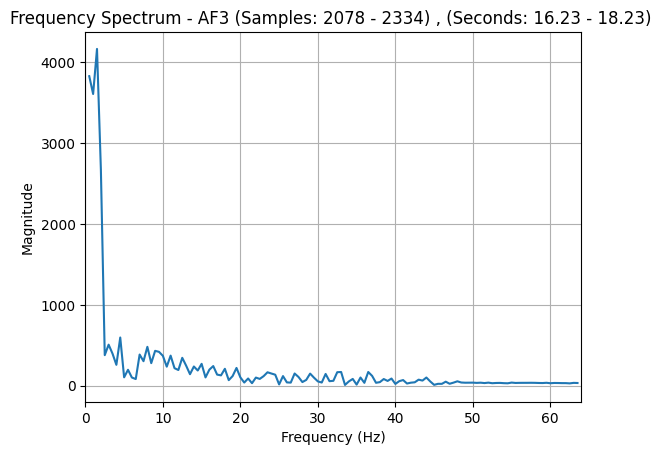

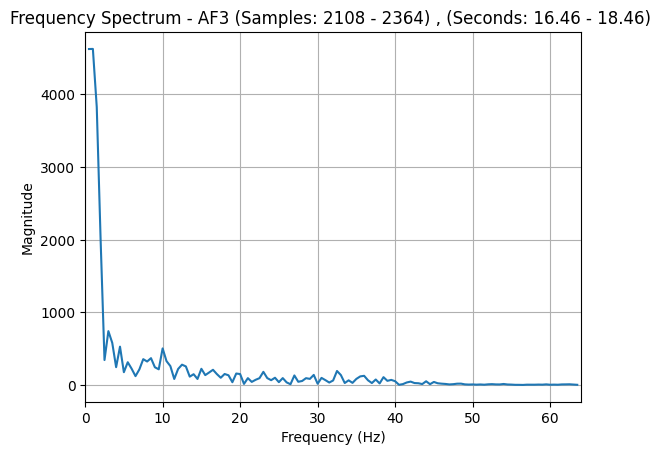

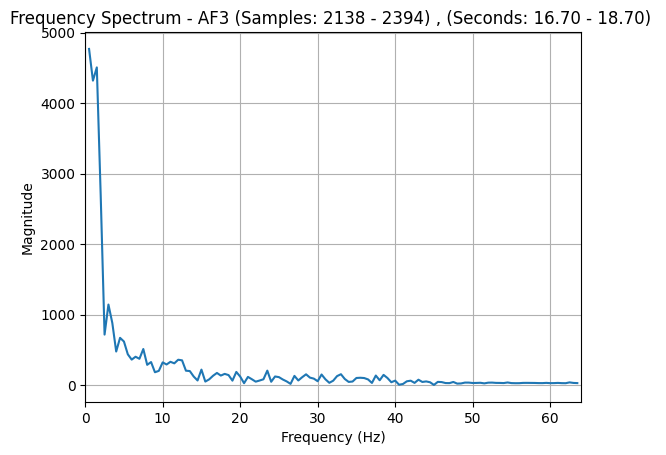

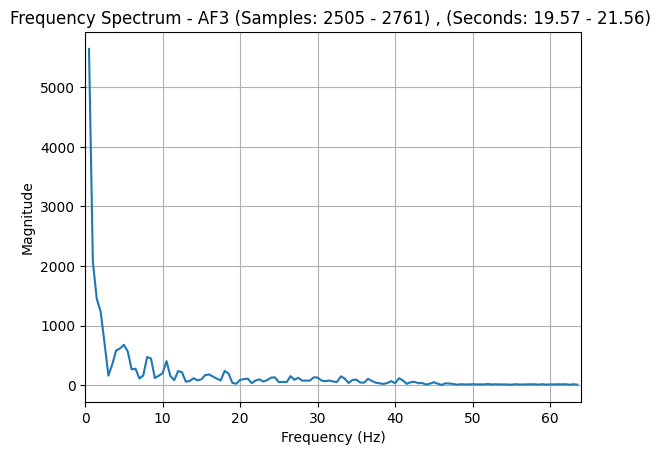

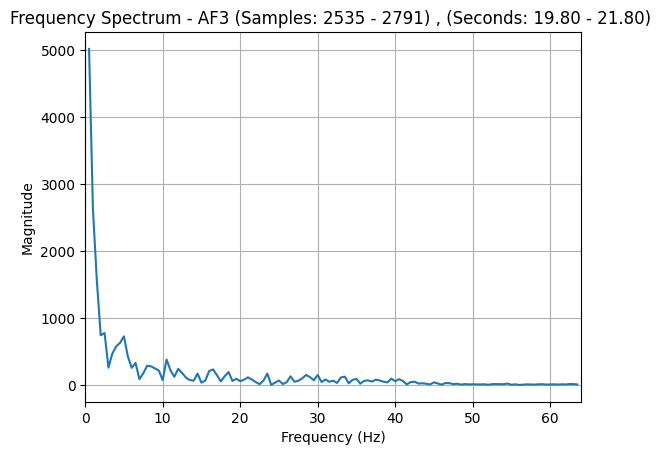

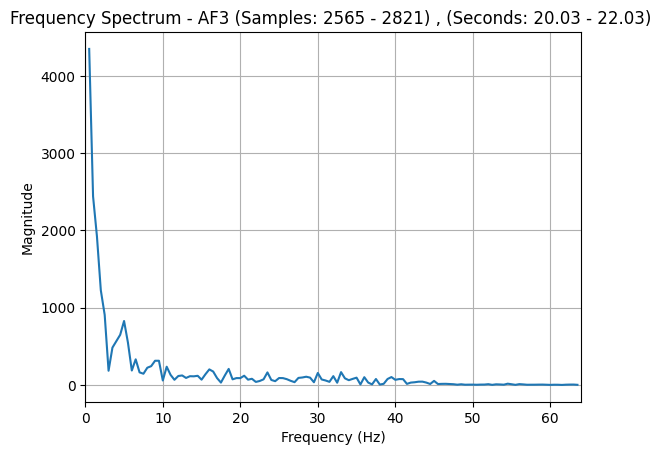

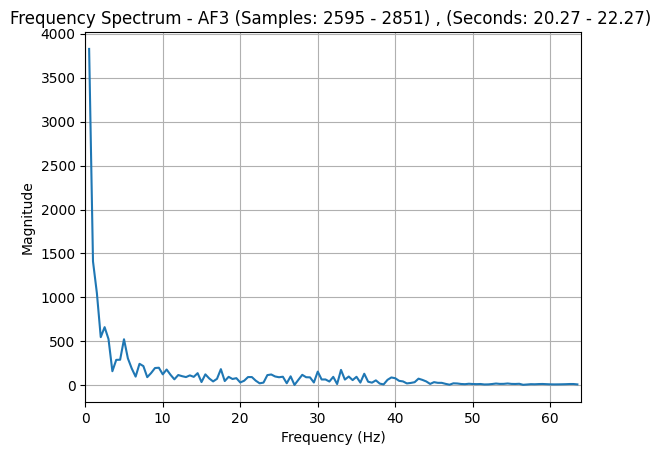

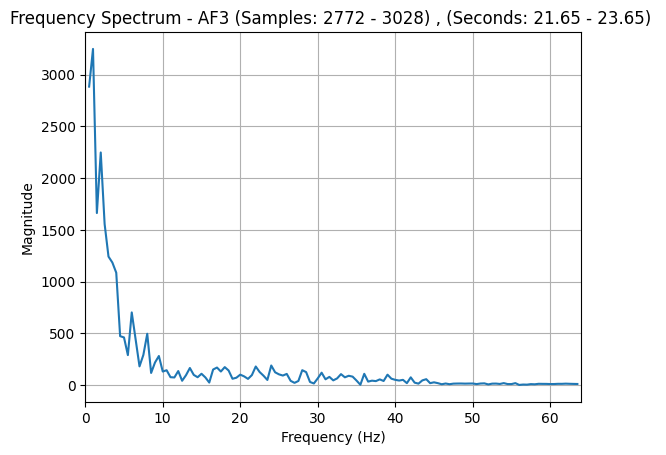

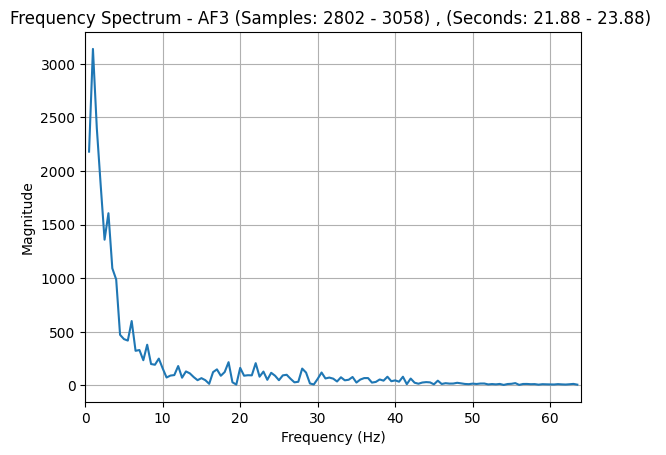

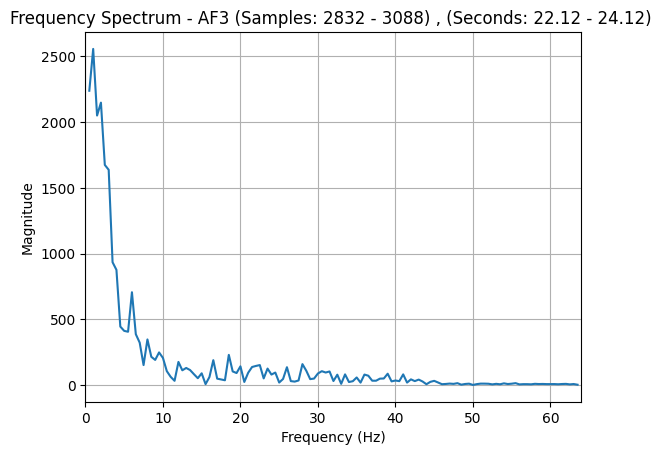

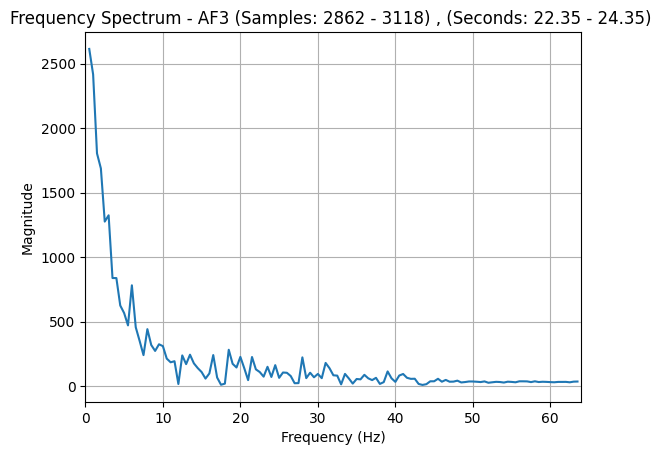

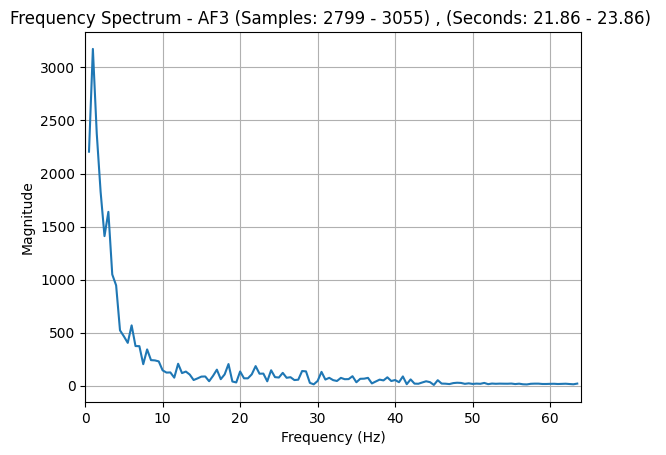

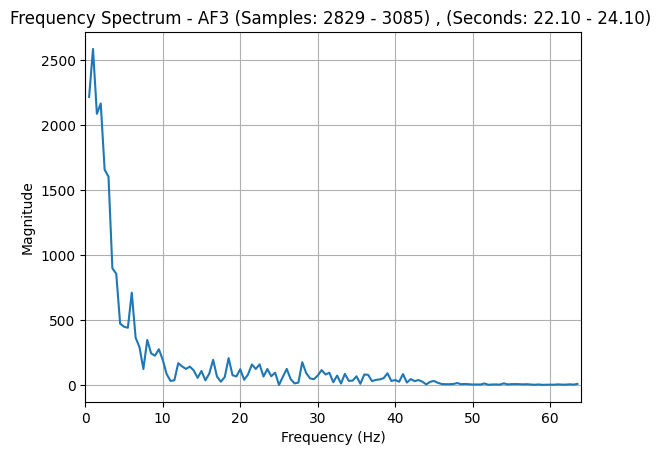

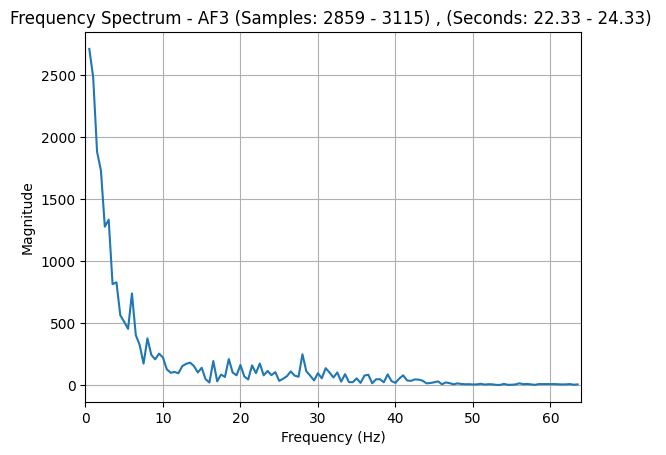

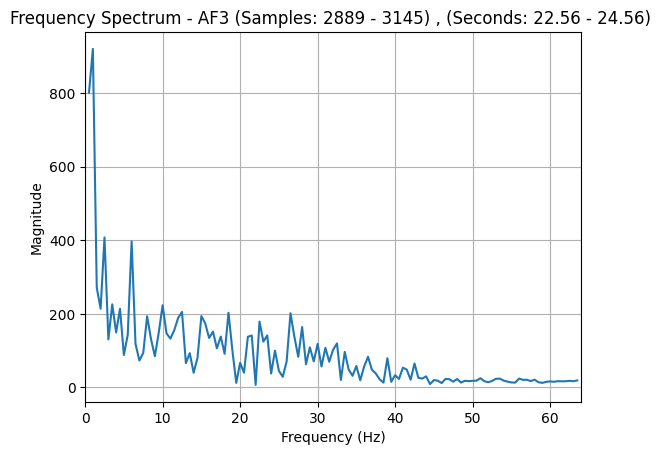

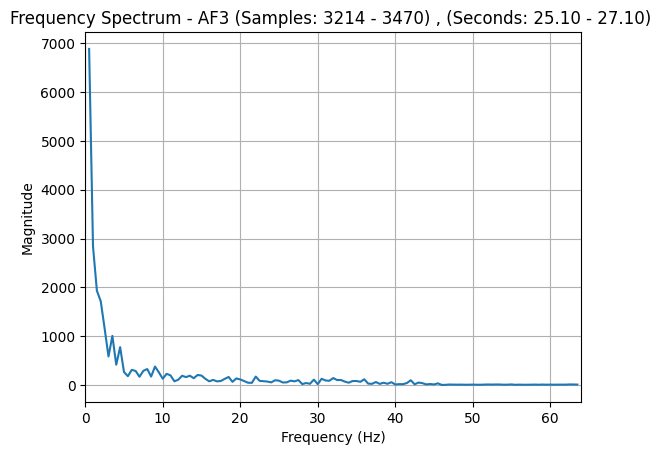

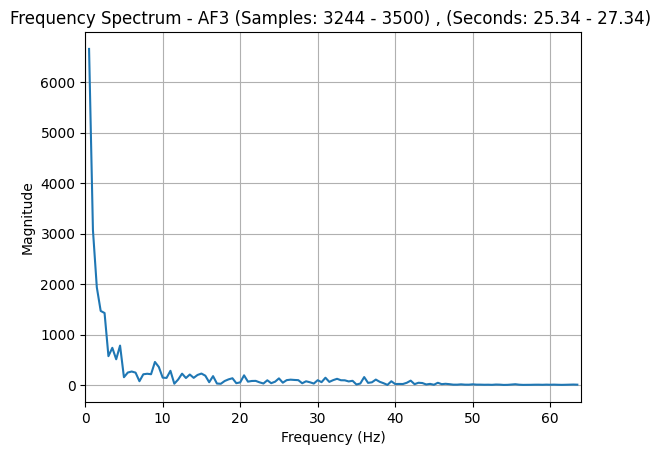

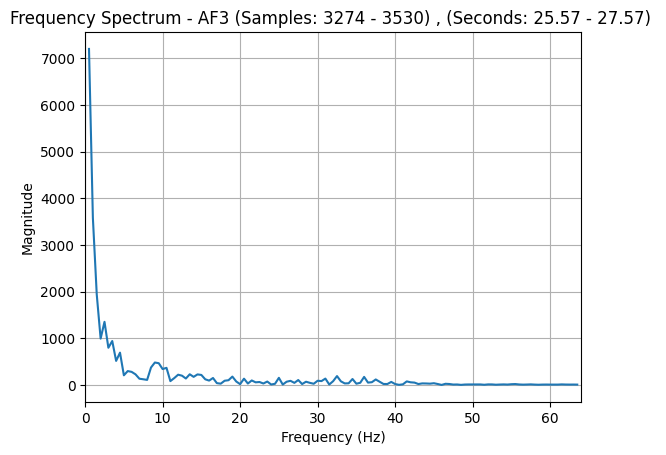

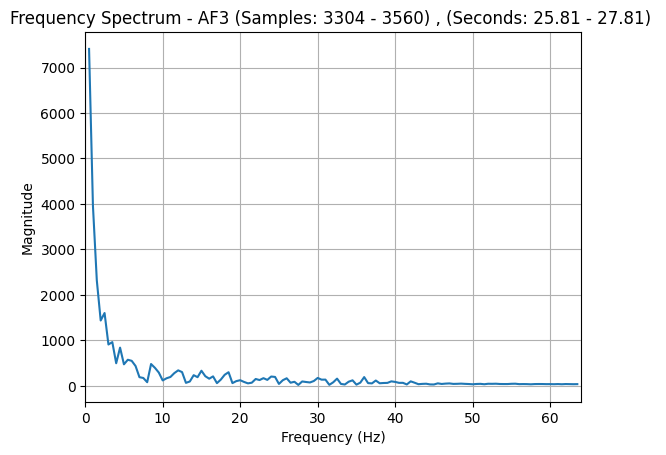

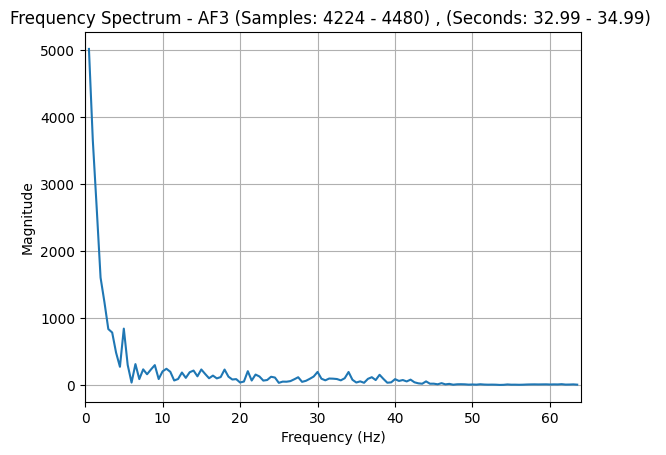

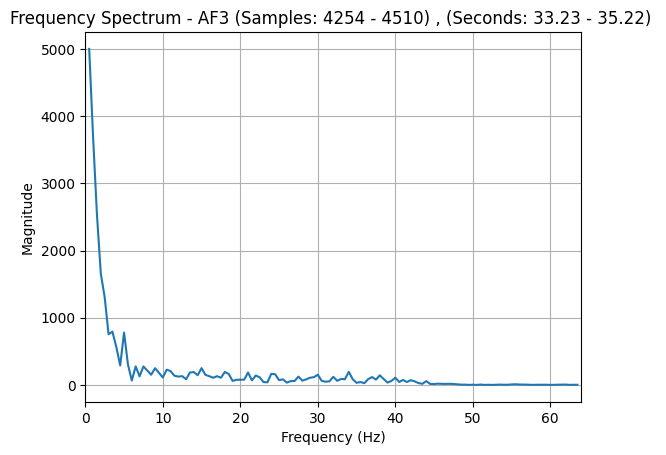

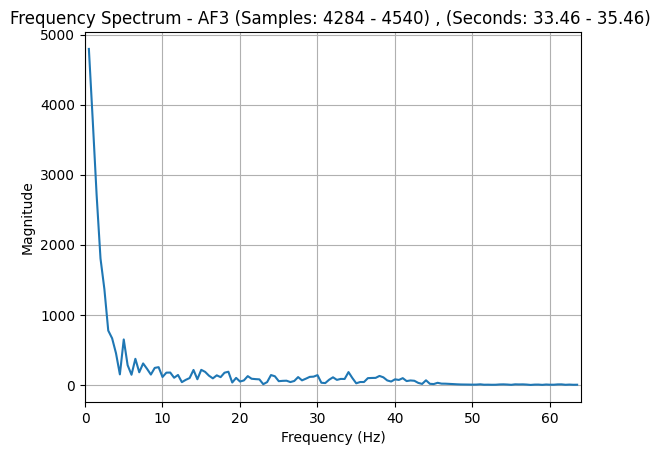

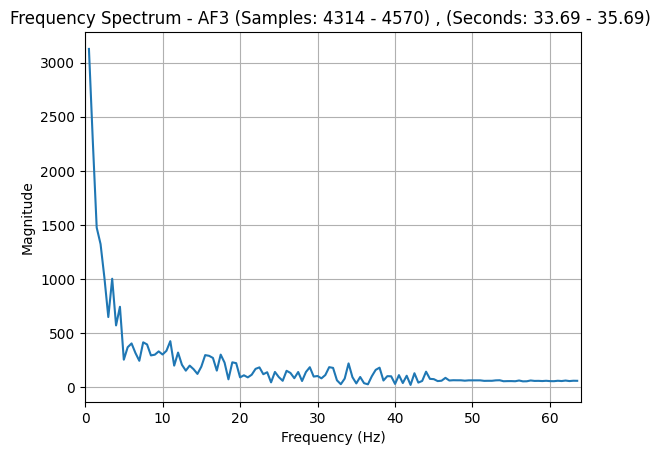

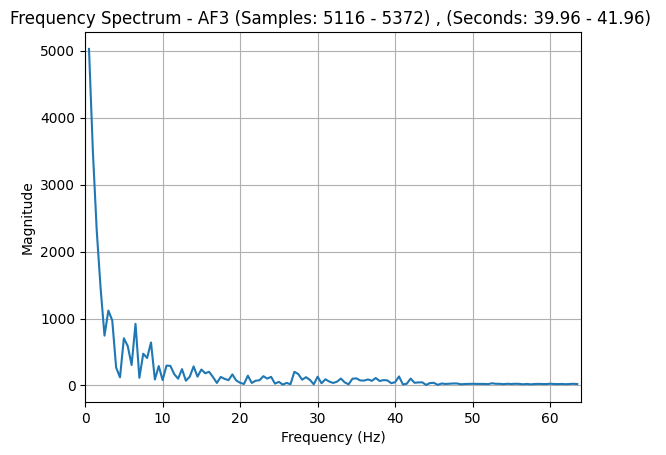

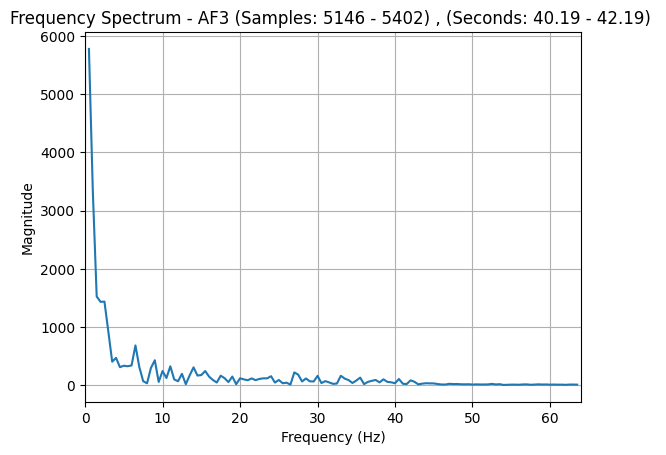

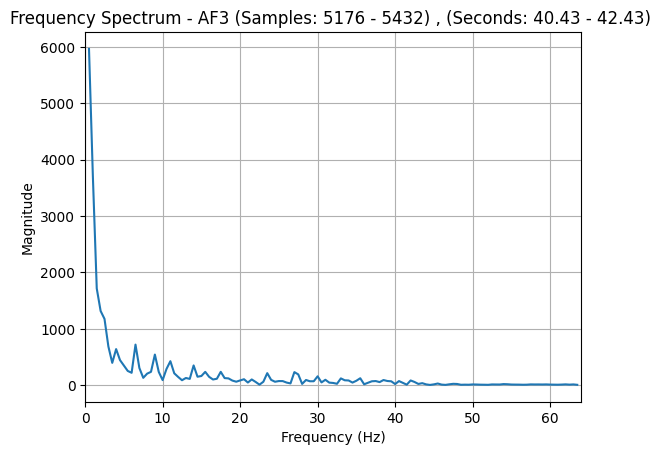

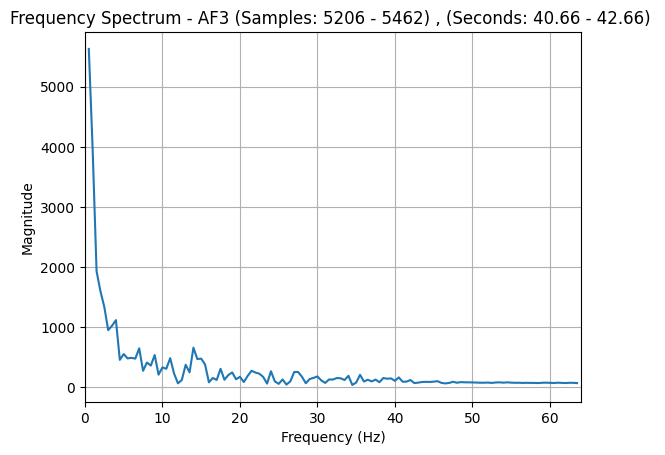

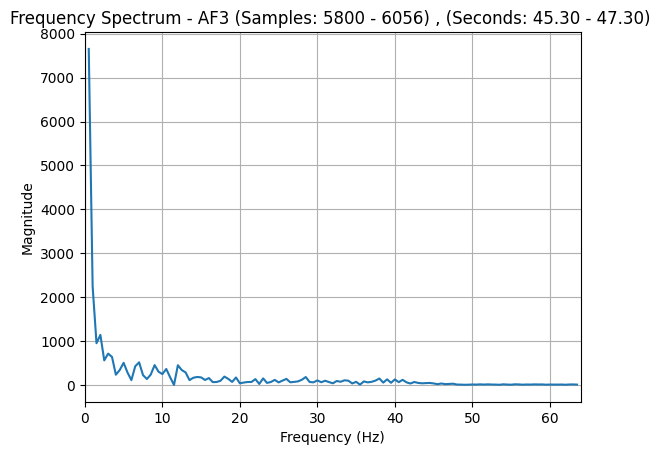

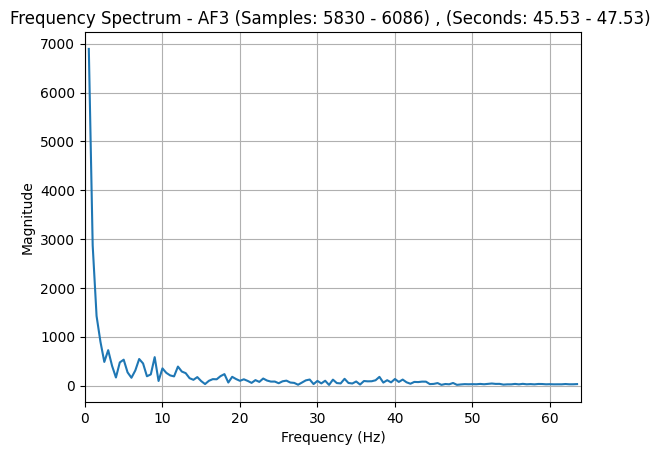

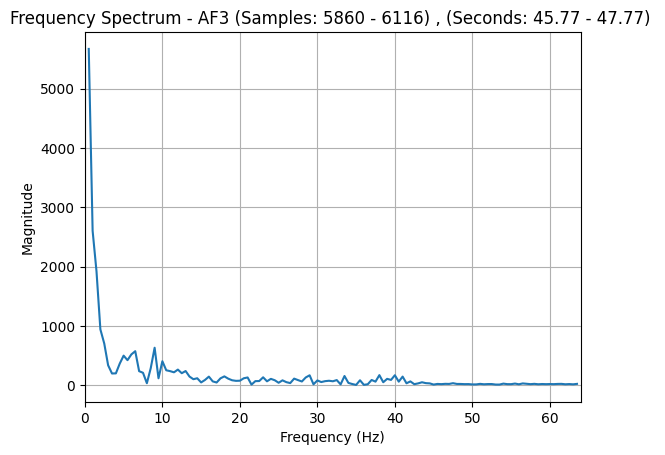

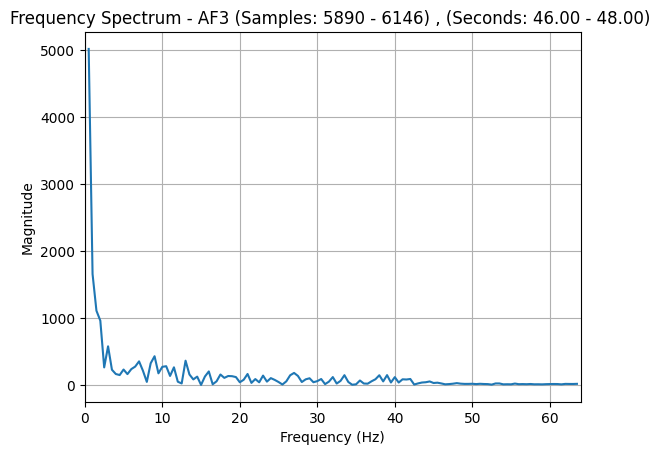

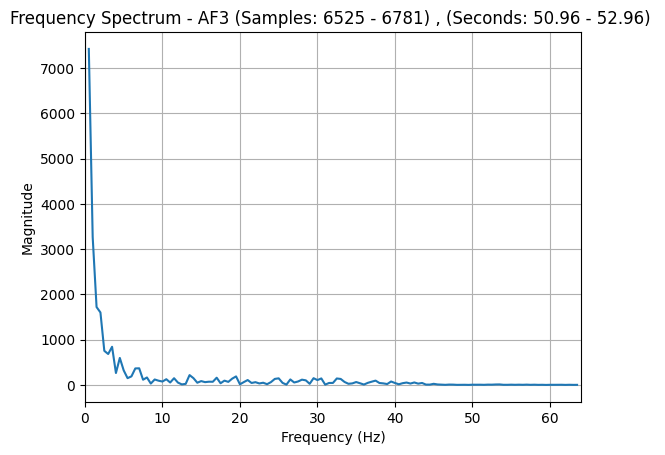

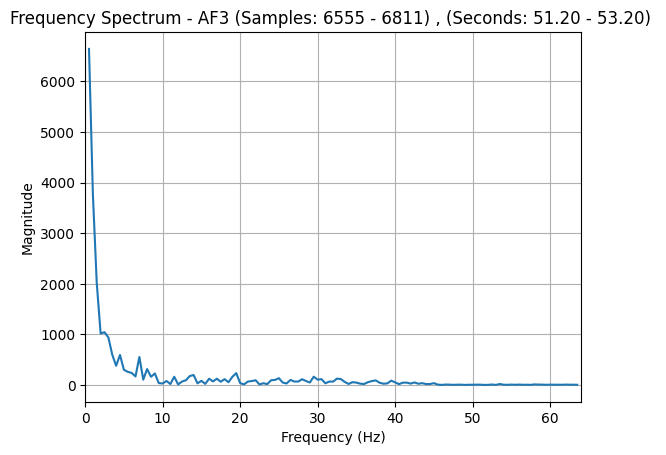

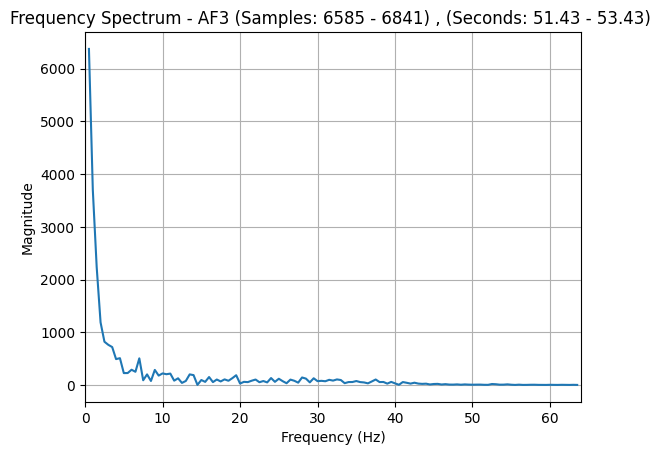

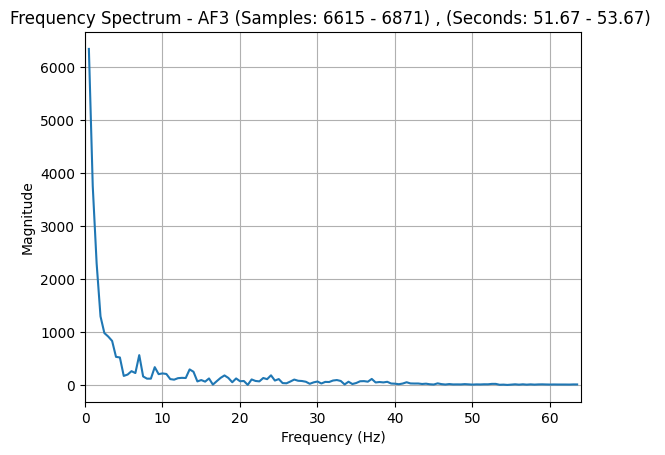

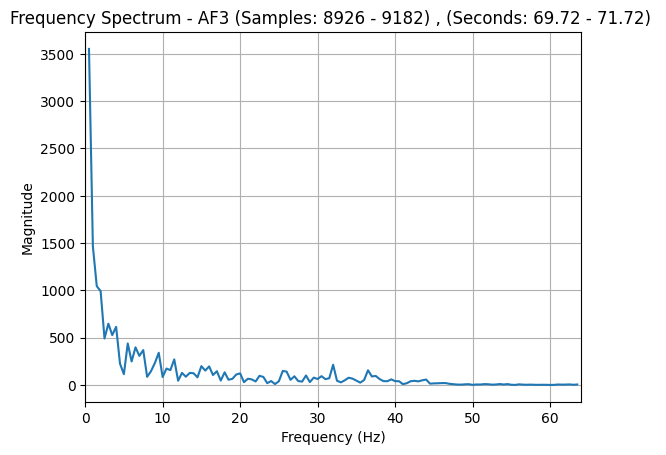

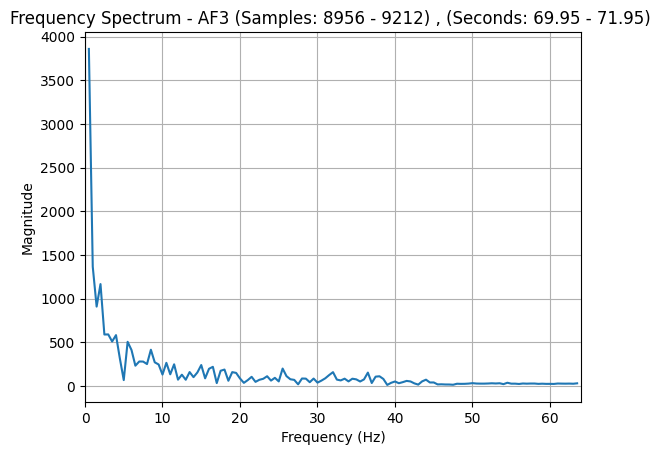

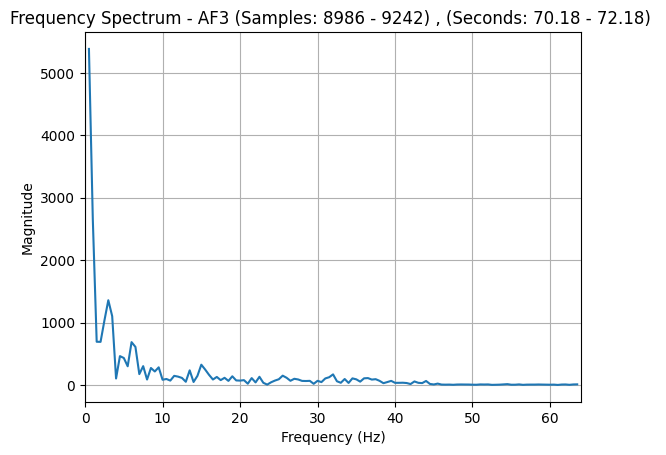

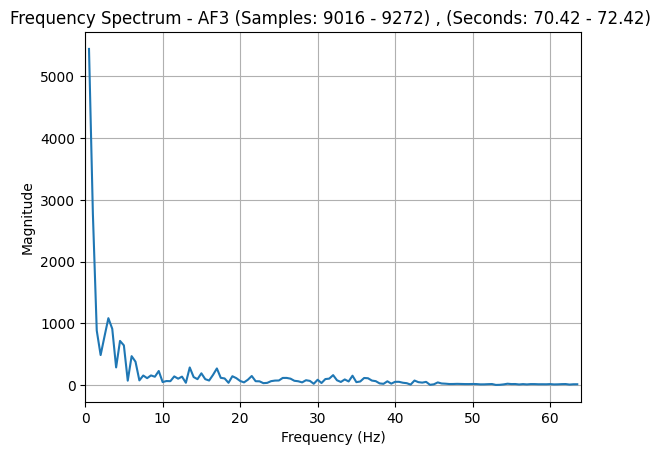

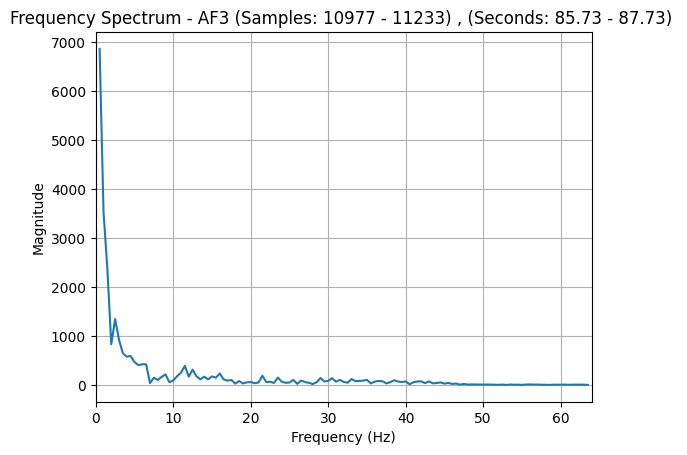

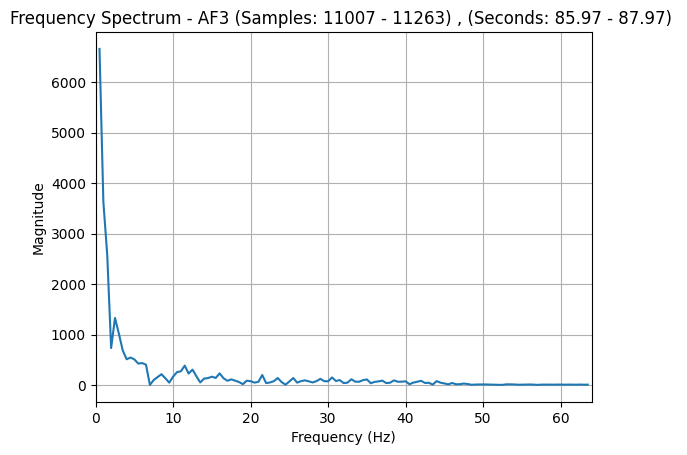

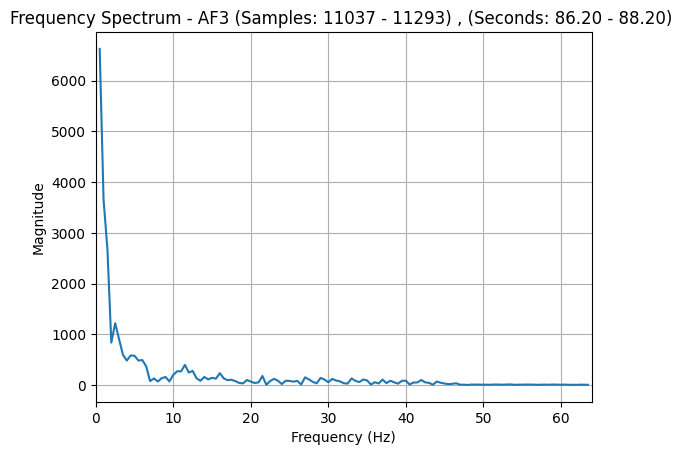

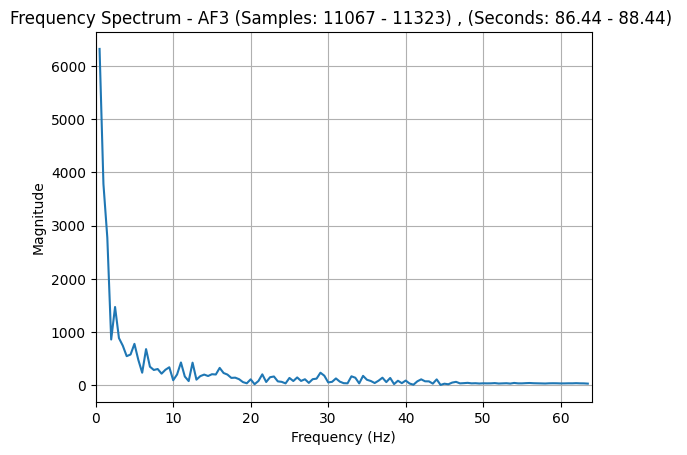

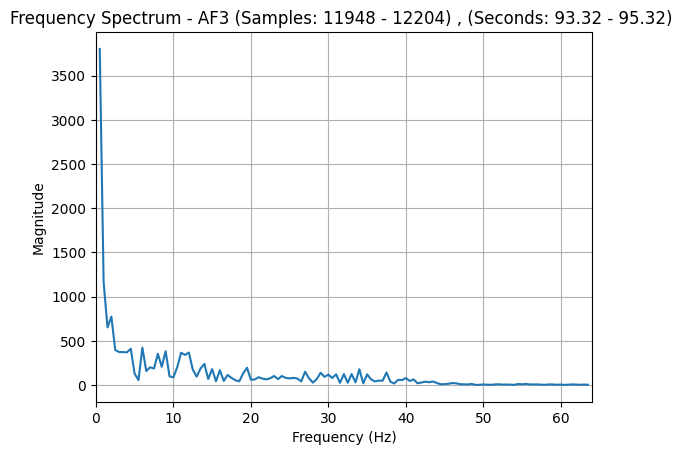

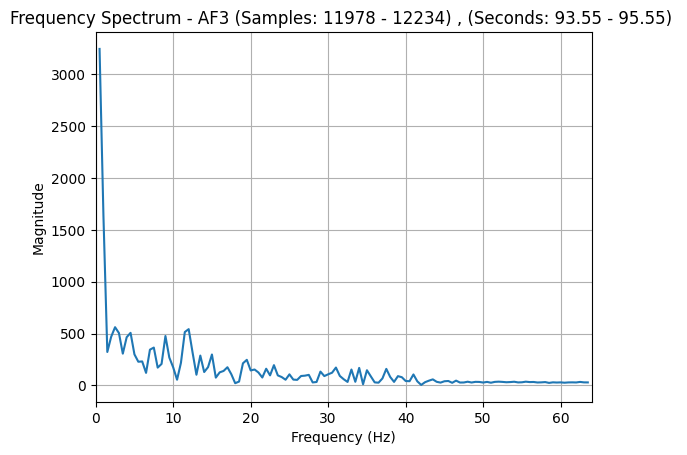

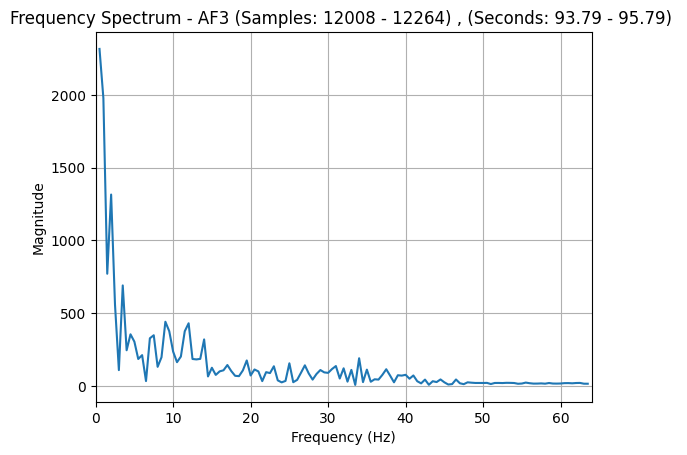

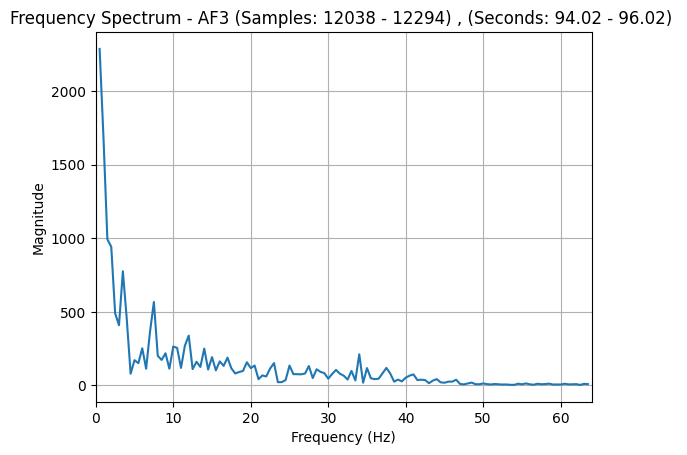

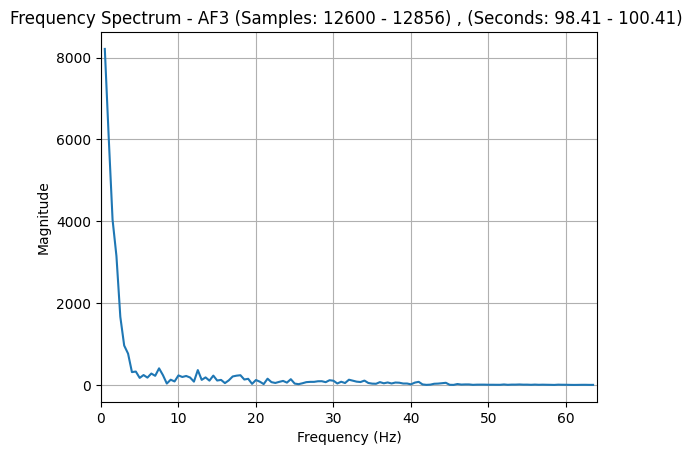

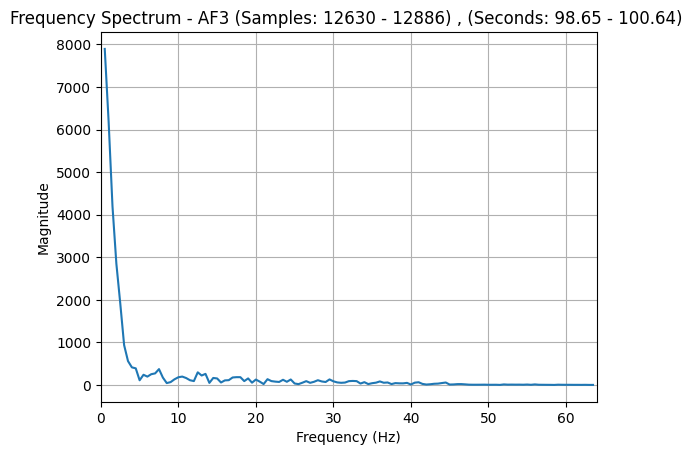

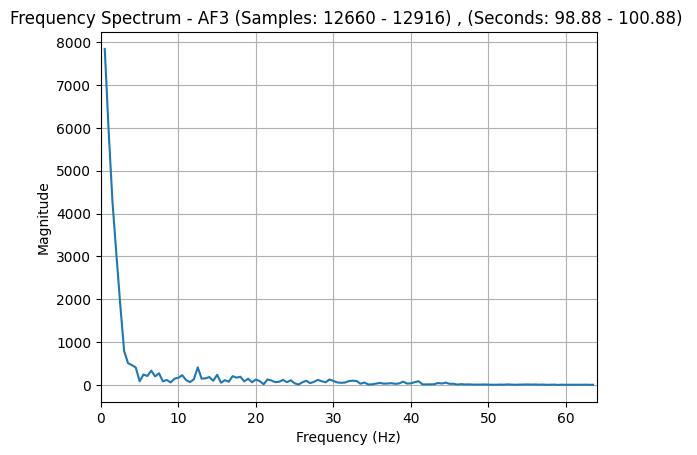

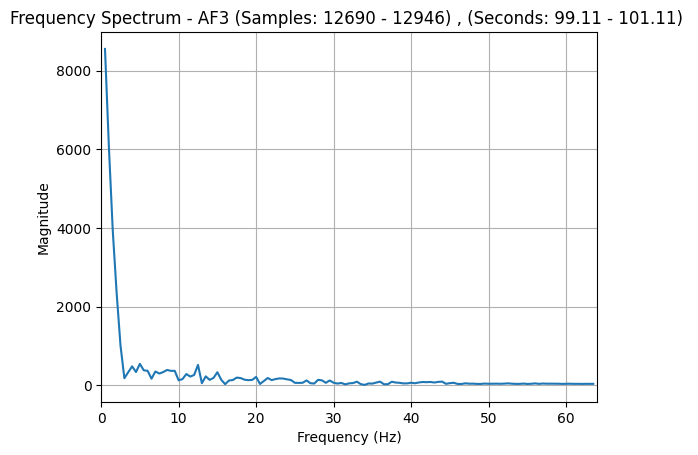

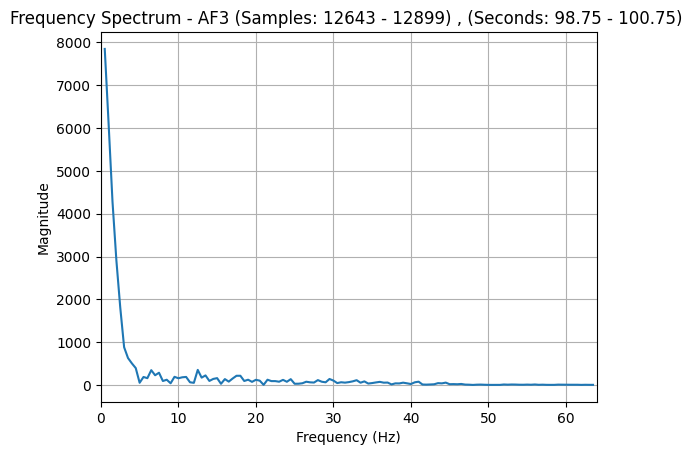

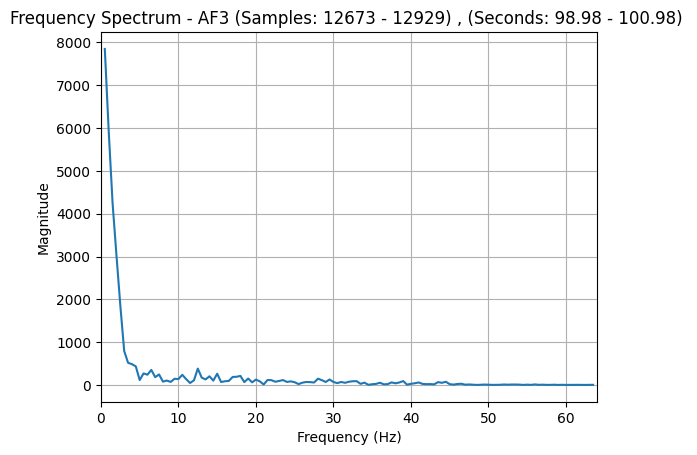

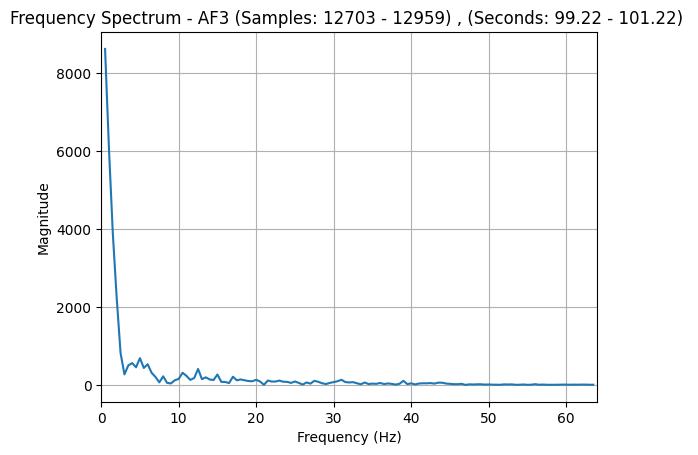

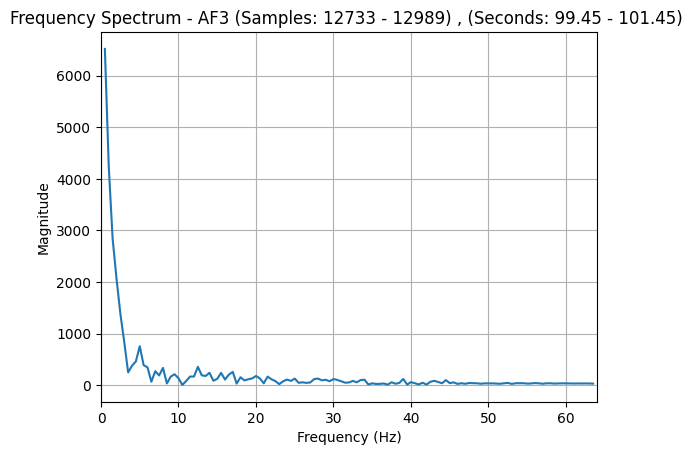

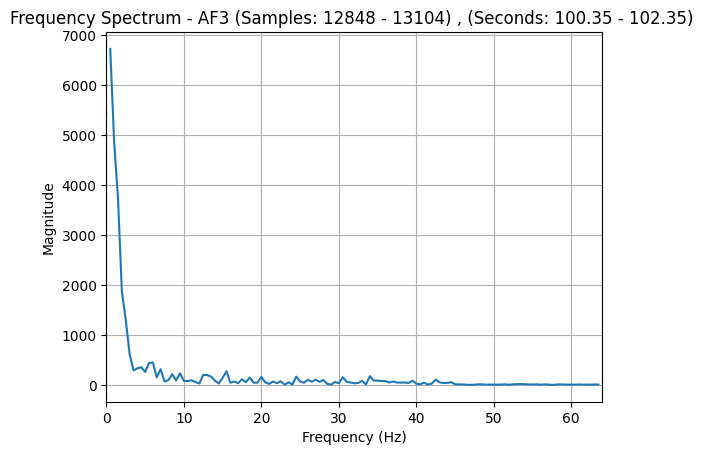

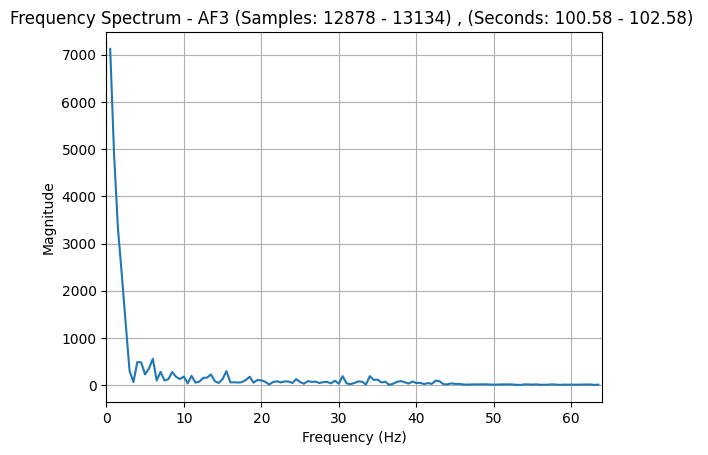

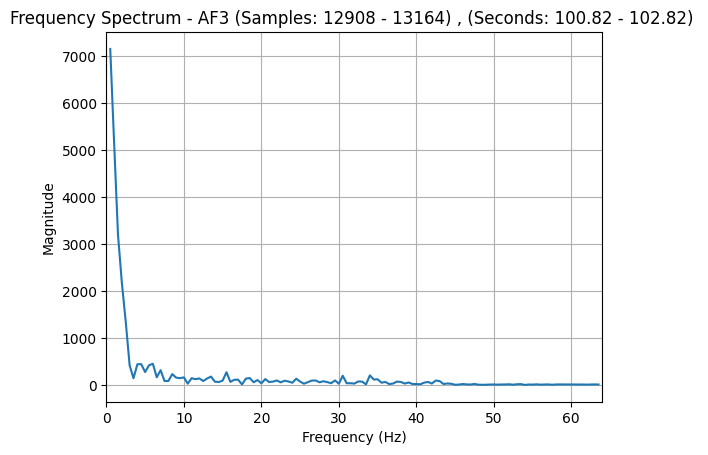

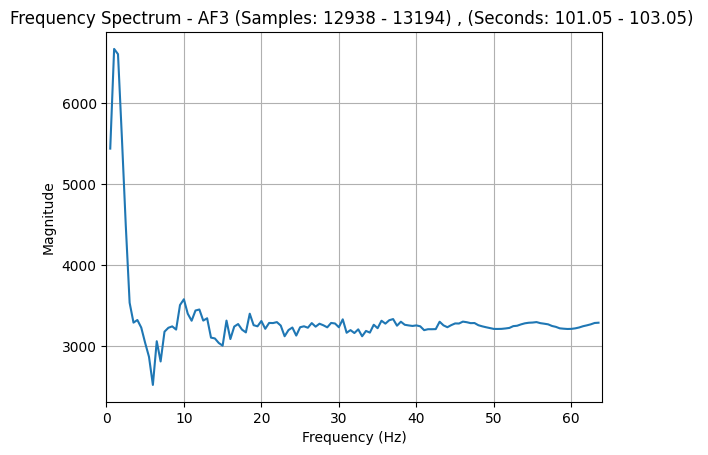

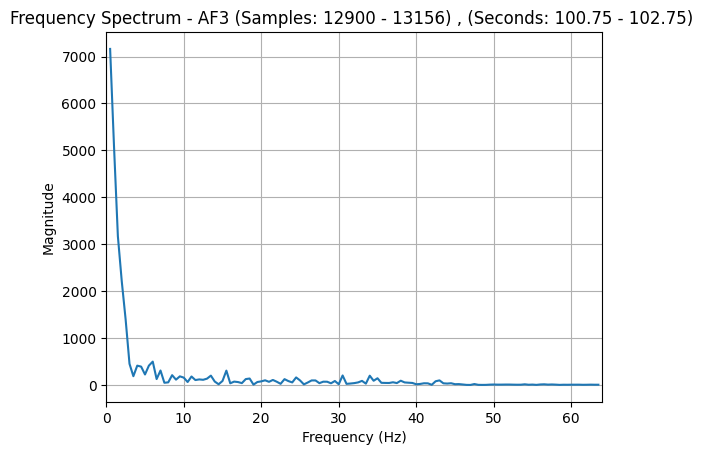

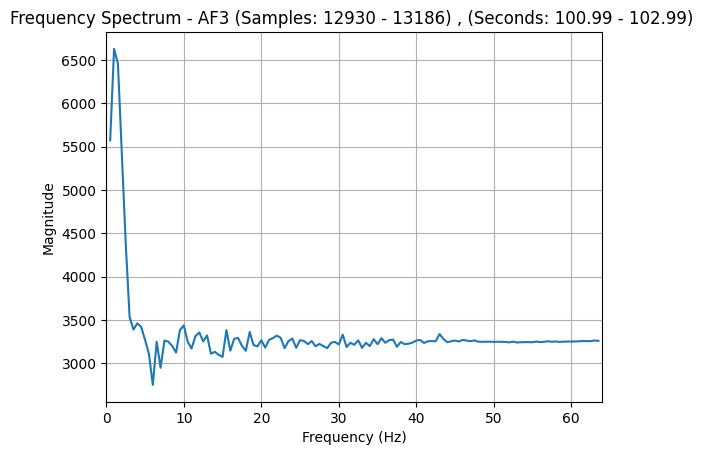

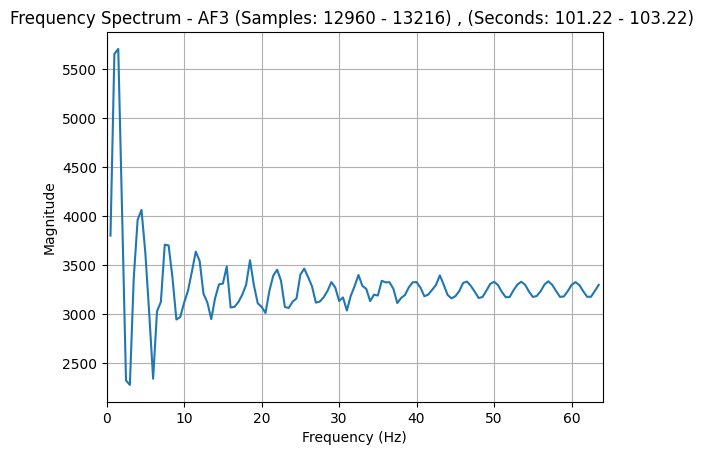

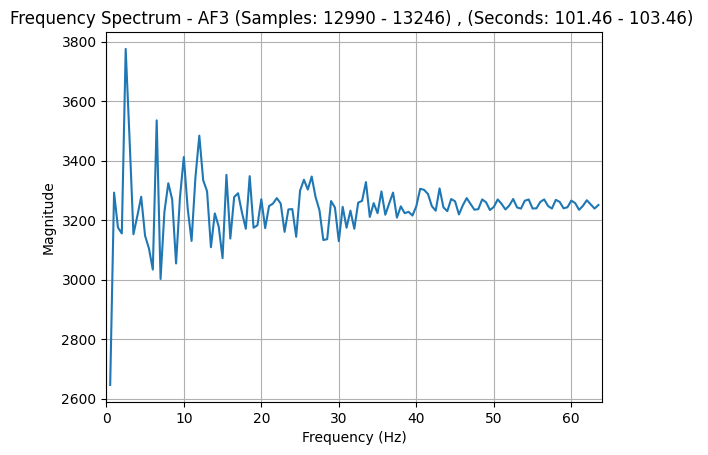

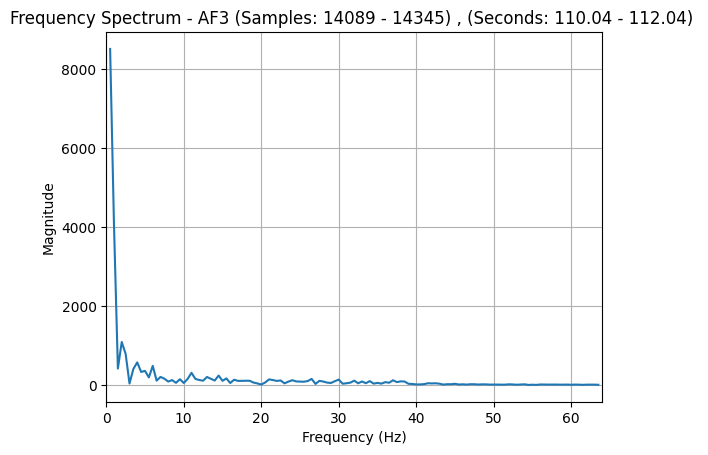

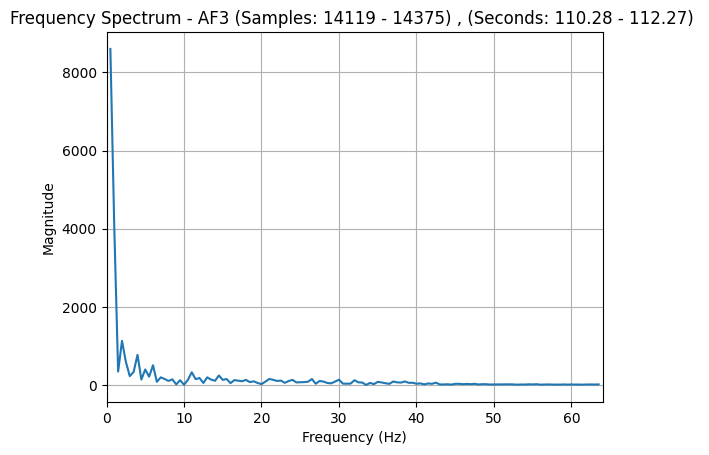

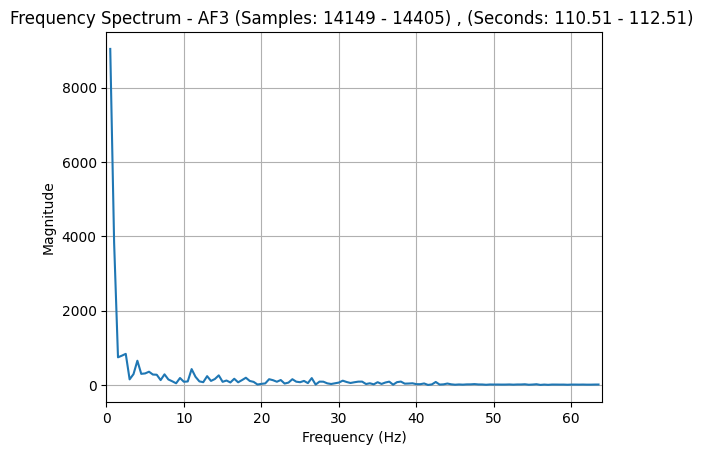

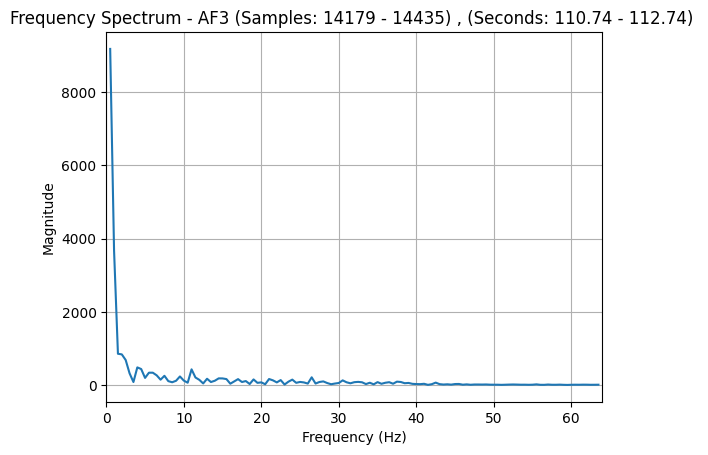

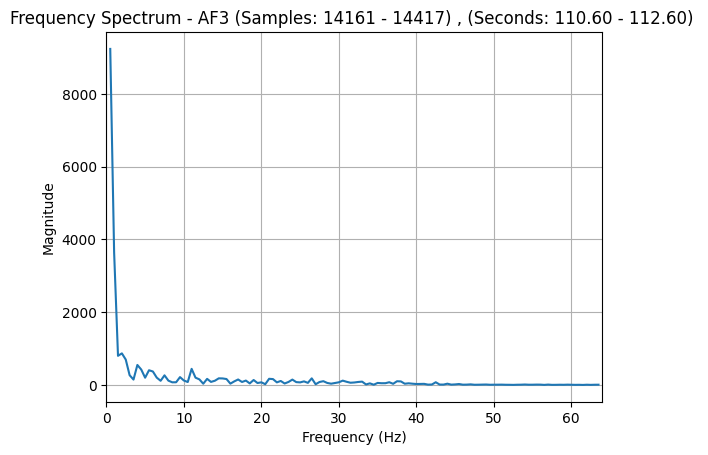

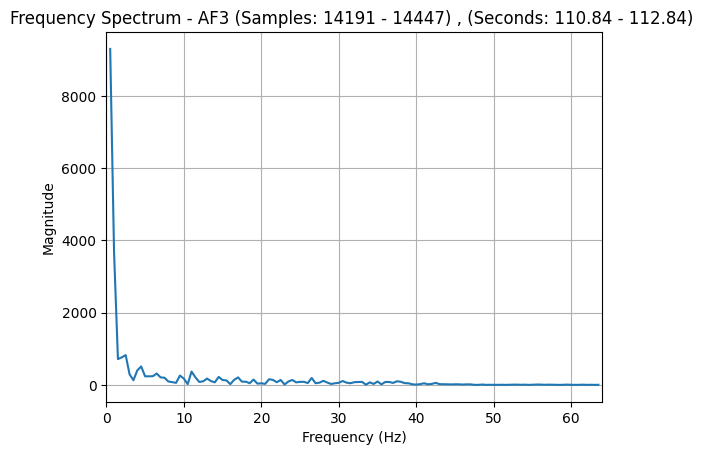

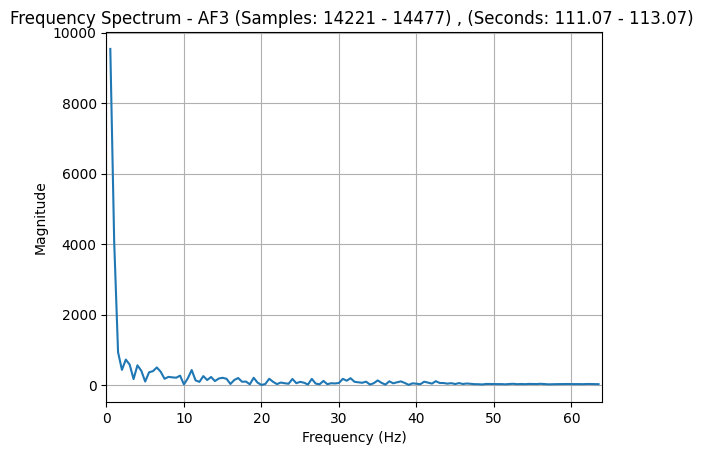

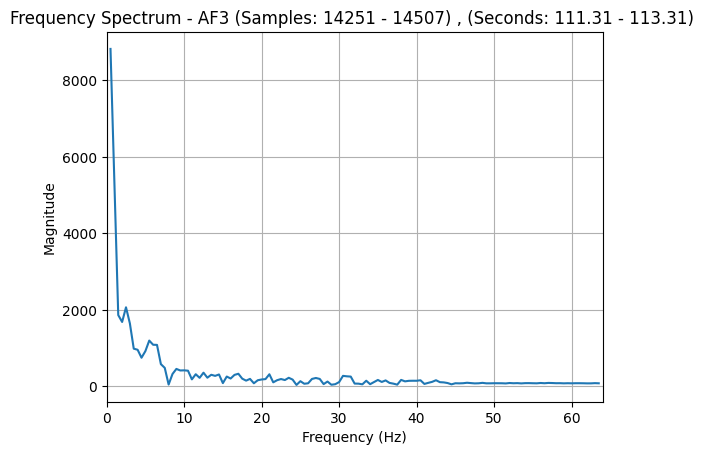

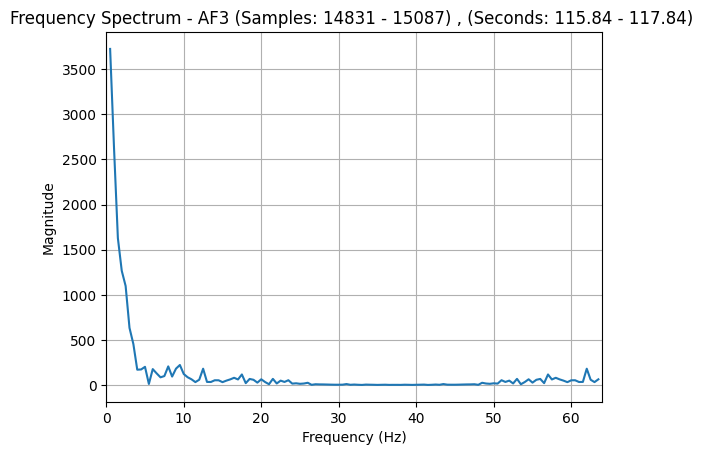

ValueError: x and y must have same first dimension, but have shapes (127,) and (118,)

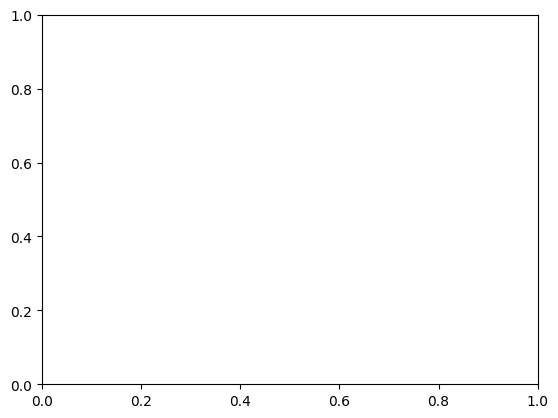

In [4]:
for i in changes_df["change_indices"]:    #running on list of samples indexes that have a change in the eye state
    j = 0                      # shifting key of the window
    for slide_step in range(4):      #There are 4 plots per change
        signal = data[feature_name][i-int(sample_rate) + j:i- int(sample_rate) + samples_window + j] 

        # Perform FFT and get the magnitude
        fft_output = np.fft.fft(signal)
        fft_magnitude = np.abs(fft_output)

        plt.plot(frequencies[1:samples_window // 2], fft_magnitude[1:samples_window // 2])  # Plot only positive frequencies
        plt.title(f"Frequency Spectrum - {feature_name} (Samples: {i -int(sample_rate) + j} - {i- int(sample_rate) + samples_window + j}) , (Seconds: {((i - int(sample_rate) + j) / sample_rate):.2f} - {((i- int(sample_rate) + samples_window + j) / sample_rate):.2f}) ")
        j = j + 30
        
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude")
        plt.xlim(0, sample_rate / 2)  # Limit x-axis to Nyquist frequency
        plt.grid(True)  
        plt.show()
        

For the first change at sample 188:
9 plots, each of them of 0.25 sec <=> 32 samples.
There are 4 plots before the change, 1 plot of the change sample, 4 plots after the change.

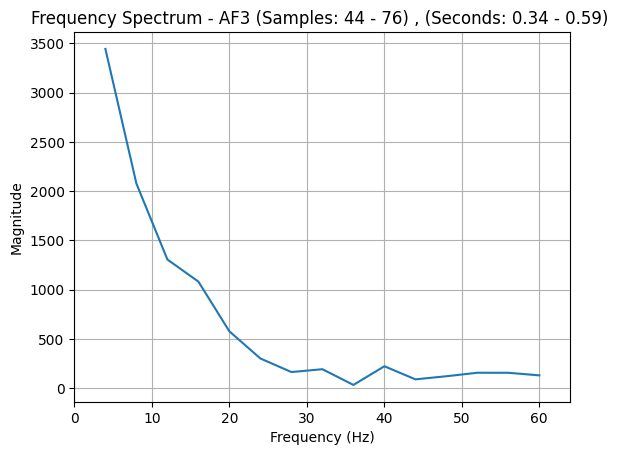

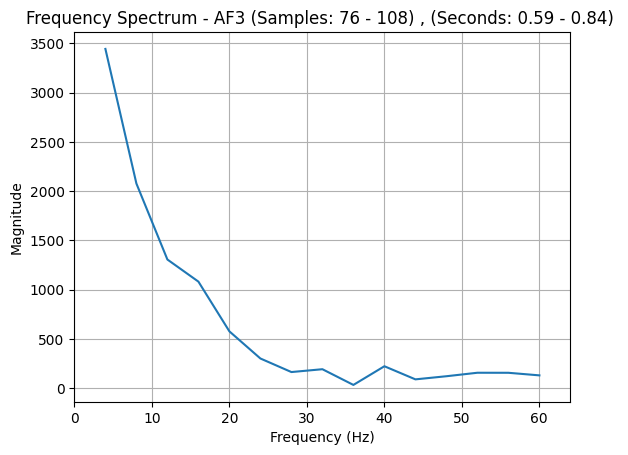

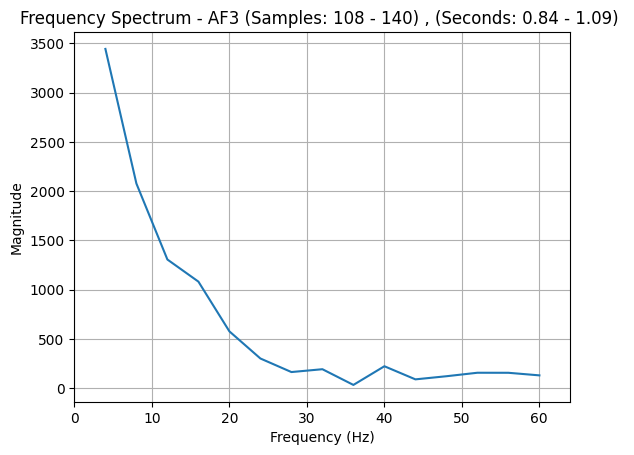

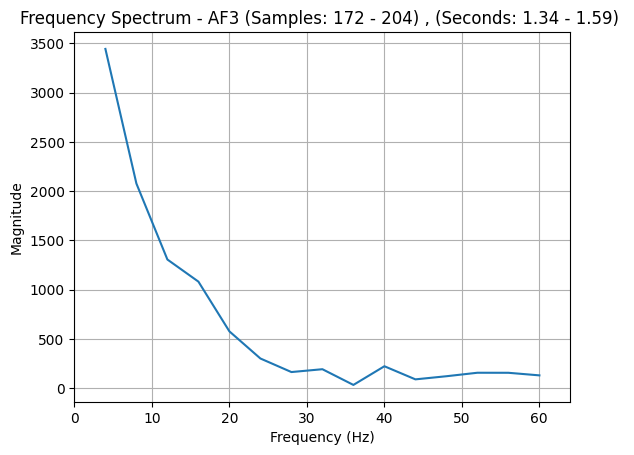

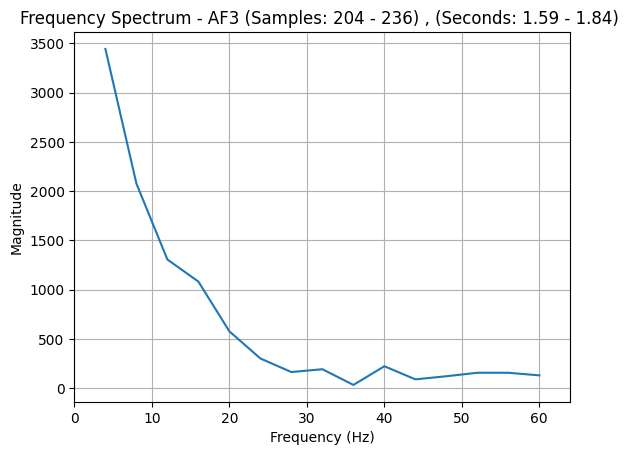

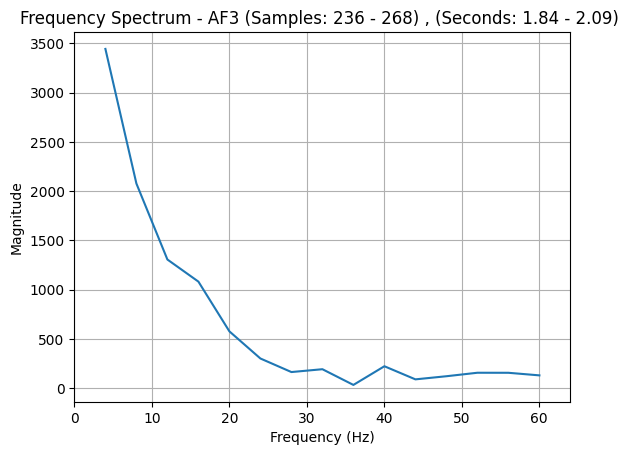

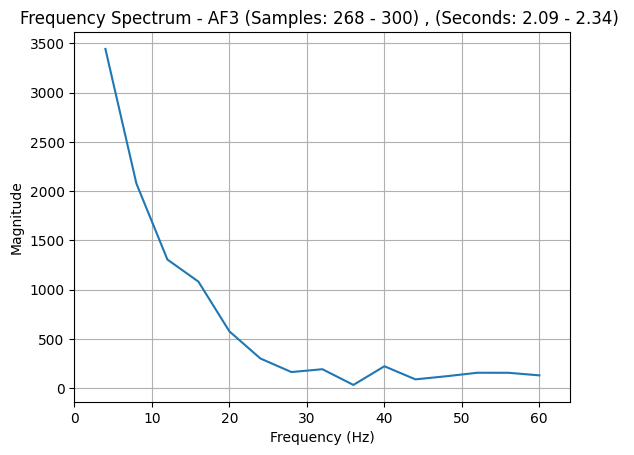

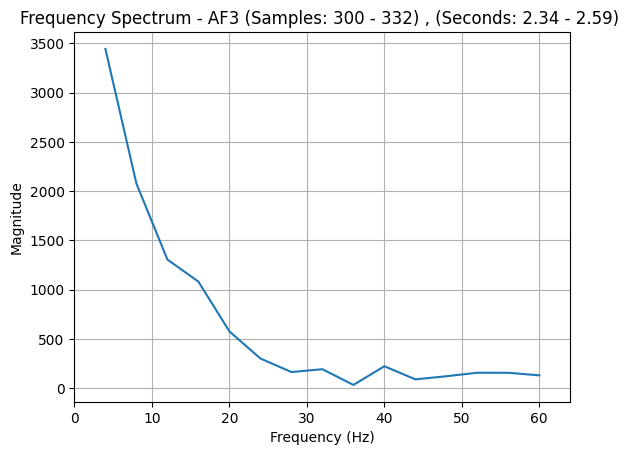

In [7]:
duration_to_analyze_new = 0.25    #seconds
samples_window_new = int(sample_rate * duration_to_analyze_new)  

# Calculate the frequency bins
frequencies_new = np.fft.fftfreq(samples_window_new, d=1/sample_rate) # Get the corresponding frequencies for the FFT result 
feature_name = data.columns[0]

m = 172    # (index of change - (sample_window_new / 2))

k = 0      # shifting key of the window
for slide_step_new in range(9):     #There are 9 plots
    signal_new = data[feature_name][m- int(sample_rate) + k:m- int(sample_rate) + samples_window_new + k]  

    # Perform FFT and get the magnitude
    fft_output_new = np.fft.fft(signal_new)
    fft_magnitude_new = np.abs(fft_output)

    plt.plot(frequencies_new[1:samples_window_new // 2], fft_magnitude_new[1:samples_window_new // 2])  # Plot only positive frequencies
    plt.title(f"Frequency Spectrum - {feature_name} (Samples: {m -int(sample_rate) + k} - {m- int(sample_rate) + samples_window_new + k}) , (Seconds: {((m - int(sample_rate) + k) / sample_rate):.2f} - {((m- int(sample_rate) + samples_window_new + k) / sample_rate):.2f}) ")
    k = k + samples_window_new
    
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(0, sample_rate / 2)  # Limit x-axis to Nyquist frequency
    plt.grid(True)  
    plt.show()

For the second change at sample 871:
9 plots, each of them of 0.25 sec <=> 32 samples.
There are 4 plots before the change, 1 plot of the change sample, 4 plots after the change.

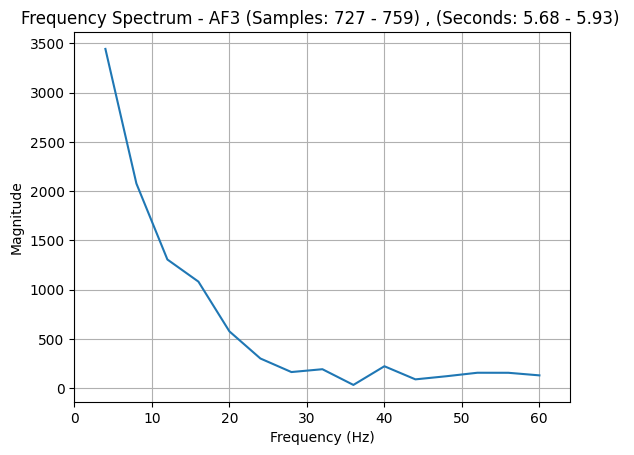

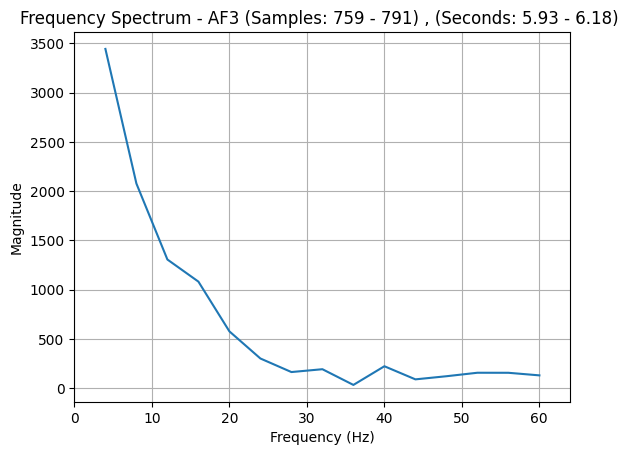

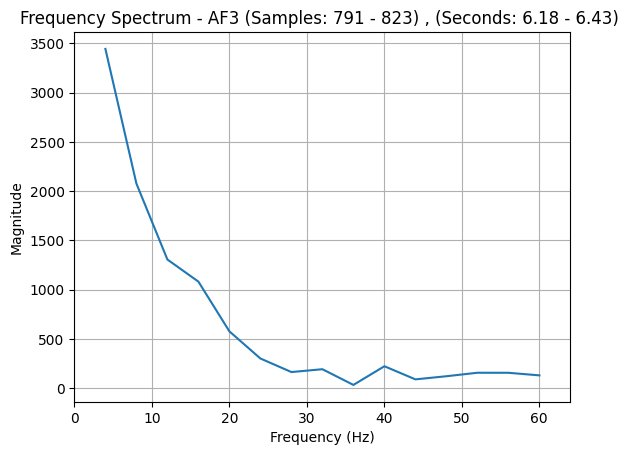

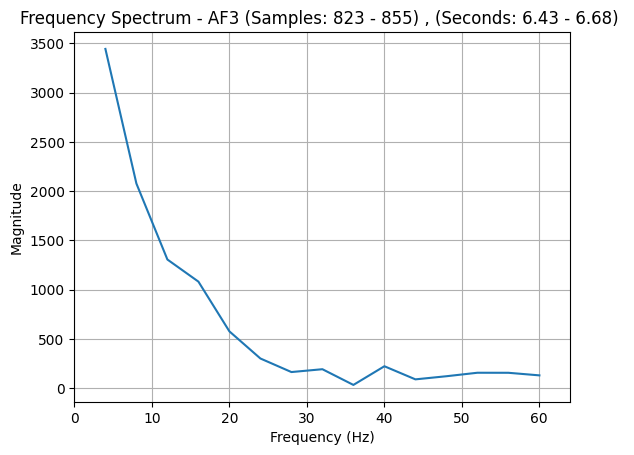

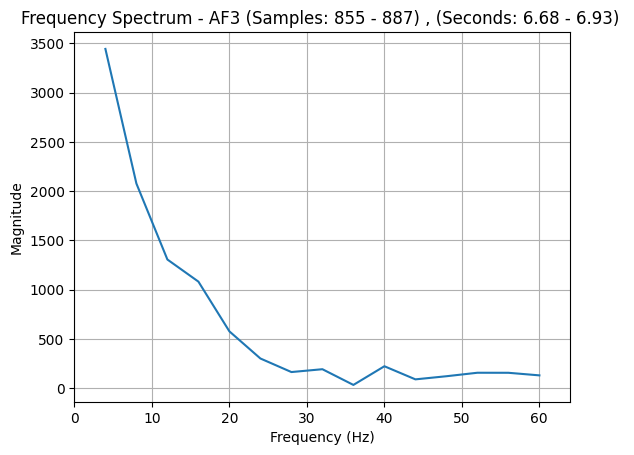

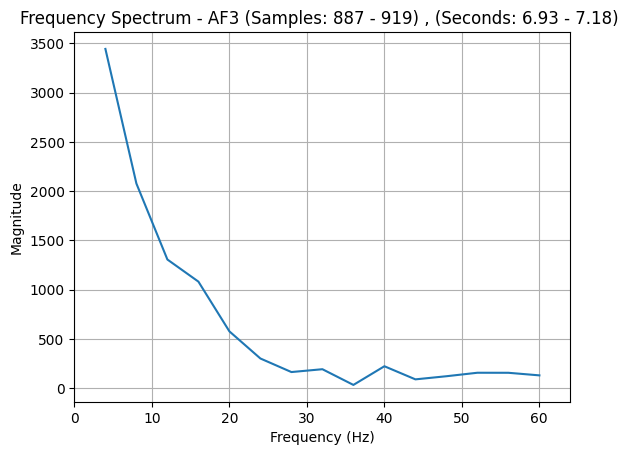

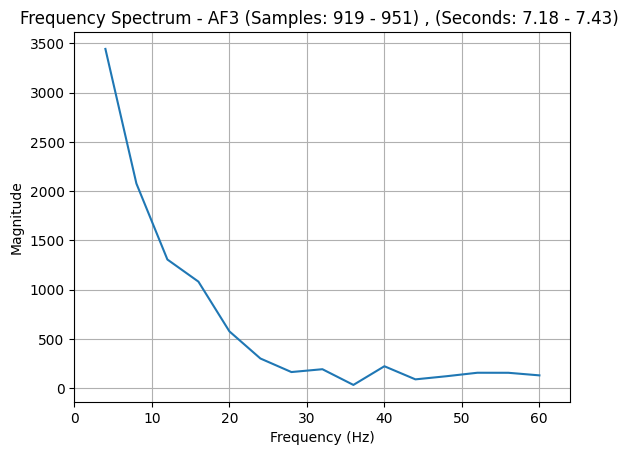

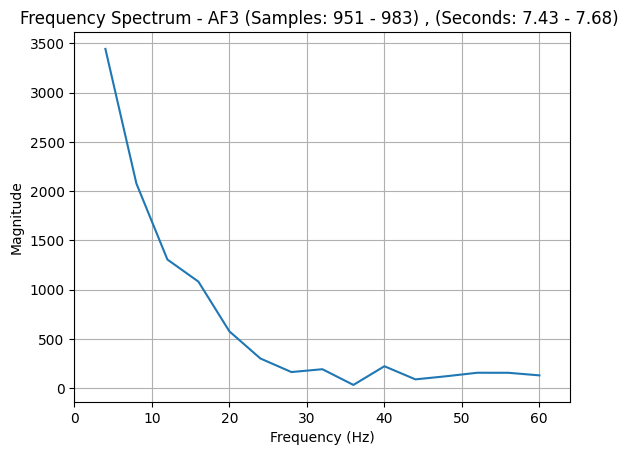

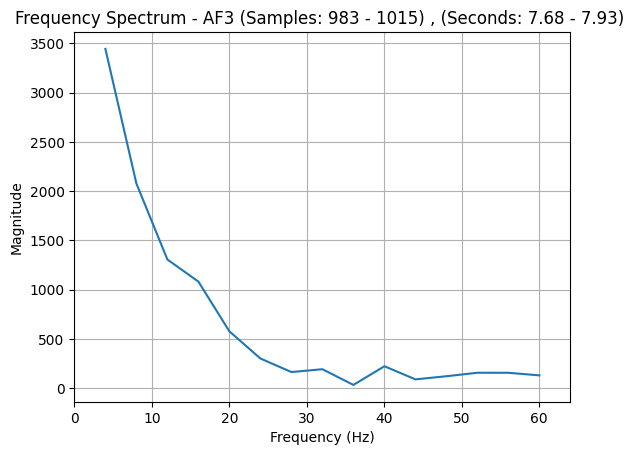

In [8]:
duration_to_analyze_new = 0.25    #seconds
samples_window_new = int(sample_rate * duration_to_analyze_new)  

# Calculate the frequency bins
frequencies_new = np.fft.fftfreq(samples_window_new, d=1/sample_rate) # Get the corresponding frequencies for the FFT result 
feature_name = data.columns[0]

m = 855    # (index of change - (sample_window_new / 2))

k = 0      # shifting key of the window
for slide_step_new in range(9):     #There are 9 plots
    signal_new = data[feature_name][m- int(sample_rate) + k:m- int(sample_rate) + samples_window_new + k]  

    # Perform FFT and get the magnitude
    fft_output_new = np.fft.fft(signal_new)
    fft_magnitude_new = np.abs(fft_output)

    plt.plot(frequencies_new[1:samples_window_new // 2], fft_magnitude_new[1:samples_window_new // 2])  # Plot only positive frequencies
    plt.title(f"Frequency Spectrum - {feature_name} (Samples: {m -int(sample_rate) + k} - {m- int(sample_rate) + samples_window_new + k}) , (Seconds: {((m - int(sample_rate) + k) / sample_rate):.2f} - {((m- int(sample_rate) + samples_window_new + k) / sample_rate):.2f}) ")
    k = k + samples_window_new
    
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(0, sample_rate / 2)  # Limit x-axis to Nyquist frequency
    plt.grid(True)  
    plt.show()